Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
from datetime import datetime
#
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
#anltdate="2020-12-11"
configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

2020-12-14
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+-------

In [2]:
#sc.stop()
#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
from datetime import datetime
#
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate,"a":1}
#
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

2020-12-14
root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate,"a":1}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

2020-12-14


### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-12-14  Afghanistan_nan         0         298.0         474.0   
1  2020-12-14      Albania_nan         0         788.0        2469.0   
2  2020-12-14      Algeria_nan         0         464.0        1523.0   
3  2020-12-14      Andorra_nan         0          50.0         148.0   
4  2020-12-14       Angola_nan         0          27.0         263.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1221.0              48527.0               48644.0  35530000.0   
1        5542.0              48530.0               49327.0   2878445.0   
2        3850.0              92102.0               92742.0  41320000.0   
3         288.0               7338.0                7371.0     77239.0   
4         597.0              16188.0               16303.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001366   
1                                       0.016860   
2                                       0.002229   
3                                       0.095016   
4                                       0.000493   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.013658                    117.0   
1                                           0.168601                    797.0   
2                                           0.022290                    640.0   
3                                           0.950155                     33.0   
4                                           0.004926                    115.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    3.292992             174.428574   
1                  276.885620             791.714294   
2                   15.488868             550.000000   
3                  427.245300              41.142857   
4                    3.499028              85.285713   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           6.873065      
1                                         385.069031      
2                                          18.635044      
3                                         745.737244      
4                                           3.632904

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {analytics_date} order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [7]:
print(configs)

{'analytics_date': '2020-12-14', 'a': 1}


In [8]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {a} order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +10 cases a day AVG last 7days 

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-14' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10
order by delta_roling_7day_AVG desc, region asc
limit 60

date                    region  delta_roling_7day_AVG  \
0   2020-12-14         United States_nan          213748.140625   
1   2020-12-14                Turkey_nan          144061.859375   
2   2020-12-14                Brazil_nan           42630.285156   
3   2020-12-14                 India_nan           29556.714844   
4   2020-12-14                Russia_nan           27219.427734   
5   2020-12-14               Germany_nan           22322.857422   
6   2020-12-14        United Kingdom_nan           18023.000000   
7   2020-12-14                 Italy_nan           16404.857422   
8   2020-12-14               Ukraine_nan           11933.000000   
9   2020-12-14                France_nan           11894.428711   
10  2020-12-14                Mexico_nan           10599.142578   
11  2020-12-14                Poland_nan           10318.142578   
12  2020-12-14                  Iran_nan            9674.571289   
13  2020-12-14           Netherlands_nan            8037.571289   
14  2020-12-14              Colombia_nan            7810.143066   
15  2020-12-14                Serbia_nan            6682.856934   
16  2020-12-14          South Africa_nan            6628.428711   
17  2020-12-14                 Spain_nan            6561.143066   
18  2020-12-14               Romania_nan            6108.428711   
19  2020-12-14             Indonesia_nan            6003.428711   
20  2020-12-14                Sweden_nan            5883.714355   
21  2020-12-14             Argentina_nan            5007.143066   
22  2020-12-14               Czechia_nan            4606.571289   
23  2020-12-14               Hungary_nan            4303.143066   
24  2020-12-14           Switzerland_nan            4190.571289   
25  2020-12-14            Azerbaijan_nan            4170.714355   
26  2020-12-14               Georgia_nan            3893.000000   
27  2020-12-14              Portugal_nan            3752.857178   
28  2020-12-14               Croatia_nan            3647.571533   
29  2020-12-14              Pakistan_nan            2927.571533   
30  2020-12-14               Morocco_nan            2850.285645   
31  2020-12-14                Jordan_nan            2789.285645   
32  2020-12-14               Denmark_nan            2736.428467   
33  2020-12-14               Austria_nan            2719.000000   
34  2020-12-14             Lithuania_nan            2636.000000   
35  2020-12-14              Bulgaria_nan            2575.428467   
36  2020-12-14                 Japan_nan            2531.714355   
37  2020-12-14               Belgium_nan            2340.142822   
38  2020-12-14              Slovakia_nan            2321.857178   
39  2020-12-14                Panama_nan            2184.000000   
40  2020-12-14               Belarus_nan            1876.857178   
41  2020-12-14            Bangladesh_nan            1855.428589   
42  2020-12-14            Canada_Ontario            1844.428589   
43  2020-12-14             Canada_Quebec            1759.428589   
44  2020-12-14                Israel_nan            1752.857178   
45  2020-12-14    West Bank and Gaza_nan            1671.428589   
46  2020-12-14                 Chile_nan            1648.142822   
47  2020-12-14            Canada_Alberta            1647.571411   
48  2020-12-14              Malaysia_nan            1540.142822   
49  2020-12-14              Slovenia_nan            1501.285767   
50  2020-12-14                  Iraq_nan            1490.571411   
51  2020-12-14               Moldova_nan            1450.428589   
52  2020-12-14           Philippines_nan            1366.571411   
53  2020-12-14               Lebanon_nan            1344.000000   
54  2020-12-14                 Burma_nan            1312.428589   
55  2020-12-14                Greece_nan            1294.714233   
56  2020-12-14  United Arab Emirates_nan            1217.142822   
57  2020-12-14                  Peru_nan            1179.285767   
58  2020-12-14                 Nepal_nan            1063.

In [10]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-14' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-12-14           United States_nan          213748.140625   
1   2020-12-14                  Turkey_nan          144061.859375   
2   2020-12-14                  Brazil_nan           42630.285156   
3   2020-12-14                  Russia_nan           27219.427734   
4   2020-12-14                 Germany_nan           22322.857422   
5   2020-12-14          United Kingdom_nan           18023.000000   
6   2020-12-14                   Italy_nan           16404.857422   
7   2020-12-14                 Ukraine_nan           11933.000000   
8   2020-12-14                  France_nan           11894.428711   
9   2020-12-14                  Mexico_nan           10599.142578   
10  2020-12-14                  Poland_nan           10318.142578   
11  2020-12-14                    Iran_nan            9674.571289   
12  2020-12-14             Netherlands_nan            8037.571289   
13  2020-12-14                Colombia_nan            7810.143066   
14  2020-12-14                  Serbia_nan            6682.856934   
15  2020-12-14            South Africa_nan            6628.428711   
16  2020-12-14                   Spain_nan            6561.143066   
17  2020-12-14                 Romania_nan            6108.428711   
18  2020-12-14                  Sweden_nan            5883.714355   
19  2020-12-14               Argentina_nan            5007.143066   
20  2020-12-14                 Czechia_nan            4606.571289   
21  2020-12-14                 Hungary_nan            4303.143066   
22  2020-12-14             Switzerland_nan            4190.571289   
23  2020-12-14              Azerbaijan_nan            4170.714355   
24  2020-12-14                 Georgia_nan            3893.000000   
25  2020-12-14                Portugal_nan            3752.857178   
26  2020-12-14                 Croatia_nan            3647.571533   
27  2020-12-14                 Morocco_nan            2850.285645   
28  2020-12-14                  Jordan_nan            2789.285645   
29  2020-12-14                 Denmark_nan            2736.428467   
..         ...                         ...                    ...   
42  2020-12-14              Canada_Alberta            1647.571411   
43  2020-12-14                Slovenia_nan            1501.285767   
44  2020-12-14                 Moldova_nan            1450.428589   
45  2020-12-14                 Lebanon_nan            1344.000000   
46  2020-12-14                  Greece_nan            1294.714233   
47  2020-12-14    United Arab Emirates_nan            1217.142822   
48  2020-12-14                 Tunisia_nan            1051.285767   
49  2020-12-14              Costa Rica_nan            1037.428589   
50  2020-12-14  Bosnia and Herzegovina_nan             944.285706   
51  2020-12-14                 Armenia_nan             912.571411   
52  2020-12-14      Dominican Republic_nan             891.285706   
53  2020-12-14         North Macedonia_nan             810.000000   
54  2020-12-14                Paraguay_nan             808.857117   
55  2020-12-14                 Albania_nan             791.714294   
56  2020-12-14     Canada_British Columbia             666.428589   
57  2020-12-14                  Latvia_nan             623.142883   
58  2020-12-14                   Libya_nan             599.857117   
59  2020-12-14                  Kosovo_nan             539.285706   
60  2020-12-14              Luxembourg_nan             534.000000   
61  2020-12-14              Montenegro_nan             454.285706   
62  2020-12-14                 Finland_nan             454.142853   
63  2020-12-14                 Estonia_nan             439.571442   
64  2020-12-14                  Norway_nan             382.857147   
65  2020-12-14                  Cyprus_nan             378.571442   
66  2020-12-14                 Uruguay_nan             343.571442   
67  2020-12-14             Canada_Manitoba             316.714294   
68  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [11]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-14' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-12-14           United States_nan          213748.140625   
1   2020-12-14                  Turkey_nan          144061.859375   
2   2020-12-14                  Brazil_nan           42630.285156   
3   2020-12-14                  Russia_nan           27219.427734   
4   2020-12-14                 Germany_nan           22322.857422   
5   2020-12-14          United Kingdom_nan           18023.000000   
6   2020-12-14                   Italy_nan           16404.857422   
7   2020-12-14                 Ukraine_nan           11933.000000   
8   2020-12-14                  Poland_nan           10318.142578   
9   2020-12-14             Netherlands_nan            8037.571289   
10  2020-12-14                  Serbia_nan            6682.856934   
11  2020-12-14                 Romania_nan            6108.428711   
12  2020-12-14                  Sweden_nan            5883.714355   
13  2020-12-14                 Czechia_nan            4606.571289   
14  2020-12-14                 Hungary_nan            4303.143066   
15  2020-12-14             Switzerland_nan            4190.571289   
16  2020-12-14              Azerbaijan_nan            4170.714355   
17  2020-12-14                 Georgia_nan            3893.000000   
18  2020-12-14                Portugal_nan            3752.857178   
19  2020-12-14                 Croatia_nan            3647.571533   
20  2020-12-14                  Jordan_nan            2789.285645   
21  2020-12-14                 Denmark_nan            2736.428467   
22  2020-12-14                 Austria_nan            2719.000000   
23  2020-12-14               Lithuania_nan            2636.000000   
24  2020-12-14                Bulgaria_nan            2575.428467   
25  2020-12-14                 Belgium_nan            2340.142822   
26  2020-12-14                Slovakia_nan            2321.857178   
27  2020-12-14                  Panama_nan            2184.000000   
28  2020-12-14                 Belarus_nan            1876.857178   
29  2020-12-14               Canada_Quebec            1759.428589   
30  2020-12-14                  Israel_nan            1752.857178   
31  2020-12-14      West Bank and Gaza_nan            1671.428589   
32  2020-12-14              Canada_Alberta            1647.571411   
33  2020-12-14                Slovenia_nan            1501.285767   
34  2020-12-14                 Moldova_nan            1450.428589   
35  2020-12-14                 Lebanon_nan            1344.000000   
36  2020-12-14              Costa Rica_nan            1037.428589   
37  2020-12-14  Bosnia and Herzegovina_nan             944.285706   
38  2020-12-14                 Armenia_nan             912.571411   
39  2020-12-14         North Macedonia_nan             810.000000   
40  2020-12-14                 Albania_nan             791.714294   
41  2020-12-14                  Latvia_nan             623.142883   
42  2020-12-14                  Kosovo_nan             539.285706   
43  2020-12-14              Luxembourg_nan             534.000000   
44  2020-12-14              Montenegro_nan             454.285706   
45  2020-12-14                 Estonia_nan             439.571442   
46  2020-12-14                  Cyprus_nan             378.571442   
47  2020-12-14             Canada_Manitoba             316.714294   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          904.063477          190920.0   
1                                         2495.812500           26919.0   
2                                          280.780396           21825.0   
3                                          263.717651           27651.0   
4                                          377.485199           14709.0   
5                                          379.774231           18447.0   
6                                          379.742065           17937.0   
7                           

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-14' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-12-14                France_nan           11894.428711   
1   2020-12-14                  Iran_nan            9674.571289   
2   2020-12-14              Colombia_nan            7810.143066   
3   2020-12-14          South Africa_nan            6628.428711   
4   2020-12-14                 Spain_nan            6561.143066   
5   2020-12-14             Argentina_nan            5007.143066   
6   2020-12-14            Canada_Ontario            1844.428589   
7   2020-12-14                 Chile_nan            1648.142822   
8   2020-12-14                Greece_nan            1294.714233   
9   2020-12-14  United Arab Emirates_nan            1217.142822   
10  2020-12-14               Tunisia_nan            1051.285767   
11  2020-12-14              Paraguay_nan             808.857117   
12  2020-12-14   Canada_British Columbia             666.428589   
13  2020-12-14                 Libya_nan             599.857117   
14  2020-12-14               Uruguay_nan             343.571442   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          237.922562           25357.0   
1                                          161.256302            7451.0   
2                                          215.384506            8702.0   
3                                          156.889404            7999.0   
4                                          196.862411               0.0   
5                                          155.409286            3558.0   
6                                          177.227173            1702.0   
7                                          120.926491            2138.0   
8                                          168.770950             692.0   
9                                          181.276596            1194.0   
10                                         124.813774             968.0   
11                                         159.231644             669.0   
12                                         182.941177               0.0   
13                                         122.218643             899.0   
14                                         138.570786             528.0   

    3_day_change  7_day_change  confirmed_yesterday  population  \
0        38625.0       83261.0            2374152.0  69990000.0   
1        25246.0       67722.0            1108269.0  83993000.0   
2        25863.0       54671.0            1425774.0  50765952.0   
3        24200.0       46399.0             860964.0  59148672.0   
4        10519.0       45928.0            1730575.0  46660000.0   
5        15944.0       35050.0            1498160.0  45106700.0   
6         5344.0       12911.0             143873.0  14570000.0   
7         5479.0       11537.0             571919.0  19081012.0   
8         3281.0        9063.0             124534.0  10740000.0   
9         3544.0        8520.0             184949.0   9400000.0   
10        3547.0        7359.0             111361.0  11791968.0   
11        2624.0        5662.0              93582.0   7111652.0   
12         737.0        4665.0              40797.0   5100000.0   
13        1596.0        4199.0              90779.0   6871292.0   
14        1221.0        2405.0               9708.0   3471150.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.339213           
1                                            0.131948           
2                                            0.280853           
3                                            0.145559           
4                                            0.370891           
5                                            0.332137           
6                                            0.098747           
7                                            0.299732           
8                                            0.115954           
9            

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-14' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date                  region  delta_roling_7day_AVG  \
0  2020-12-14              Mexico_nan           10599.142578   
1  2020-12-14             Morocco_nan            2850.285645   
2  2020-12-14  Dominican Republic_nan             891.285706   
3  2020-12-14             Finland_nan             454.142853   
4  2020-12-14              Norway_nan             382.857147   
5  2020-12-14              Kuwait_nan             264.142853   
6  2020-12-14             Namibia_nan             208.285721   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         115.350655            8608.0   
1                                         108.384338            2012.0   
2                                         115.275597            1107.0   
3                                         115.327408             360.0   
4                                         100.056000             200.0   
5                                          89.388443             174.0   
6                                         114.762260             267.0   

   3_day_change  7_day_change  confirmed_yesterday   population  \
0       32918.0       74194.0            1250044.0  128640792.0   
1        8080.0       19952.0             399609.0   36817128.0   
2        2971.0        6239.0             154692.0   10824494.0   
3        1238.0        3179.0              30810.0    5513000.0   
4         980.0        2680.0              41003.0    5357000.0   
5         723.0        1849.0             146218.0    4137000.0   
6         763.0        1458.0              16536.0    2540905.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.097173                  11620.0   
1                                           0.108539                   3582.0   
2                                           0.142910                    726.0   
3                                           0.055888                    552.0   
4                                           0.076543                    482.0   
5                                           0.353442                    320.0   
6                                           0.065083                    176.0   

   delta_new_cases_per_1M_hab  
0                   90.329048  
1                   97.291672  
2                   67.070107  
3                  100.126976  
4                   89.975731  
5                   77.350739  
6                   69.266663

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [14]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-14' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                     region  delta_roling_7day_AVG  \
0   2020-12-14                   Oman_nan             193.428574   
1   2020-12-14            El Salvador_nan             180.428574   
2   2020-12-14            Afghanistan_nan             174.428574   
3   2020-12-14           Saudi Arabia_nan             167.857147   
4   2020-12-14                  Qatar_nan             150.428574   
5   2020-12-14             Uzbekistan_nan             129.000000   
6   2020-12-14           Burkina Faso_nan             116.857140   
7   2020-12-14                  Syria_nan             109.000000   
8   2020-12-14             Mozambique_nan             101.428574   
9   2020-12-14                   Mali_nan              97.000000   
10  2020-12-14                  Ghana_nan              94.142860   
11  2020-12-14            China_Hong Kong              92.000000   
12  2020-12-14                   Cuba_nan              91.571426   
13  2020-12-14                 Angola_nan              85.285713   
14  2020-12-14               Zimbabwe_nan              75.428574   
15  2020-12-14                  Niger_nan              57.428570   
16  2020-12-14               Cameroon_nan              55.857143   
17  2020-12-14             France_Reunion              33.000000   
18  2020-12-14          Cote d'Ivoire_nan              27.857143   
19  2020-12-14               Thailand_nan              18.571428   
20  2020-12-14                Iceland_nan              10.714286   
21  2020-12-14              Singapore_nan               8.571428   
22  2020-12-14          France_Martinique               7.857143   
23  2020-12-14              Nicaragua_nan               7.000000   
24  2020-12-14             China_Shanghai               6.571429   
25  2020-12-14  Australia_New South Wales               4.428571   
26  2020-12-14                Vietnam_nan               4.428571   
27  2020-12-14              China_Sichuan               2.857143   
28  2020-12-14                Taiwan*_nan               2.857143   
29  2020-12-14            New Zealand_nan               2.428571   
30  2020-12-14            China_Guangdong               1.857143   
31  2020-12-14       Australia_Queensland               1.714286   
32  2020-12-14               Cambodia_nan               1.571429   
33  2020-12-14         China_Heilongjiang               1.285714   
34  2020-12-14         Australia_Victoria               1.000000   
35  2020-12-14              China_Jiangsu               0.571429   
36  2020-12-14              China_Beijing               0.428571   
37  2020-12-14               China_Yunnan               0.428571   
38  2020-12-14               China_Fujian               0.285714   
39  2020-12-14       China_Inner Mongolia               0.285714   
40  2020-12-14             China_Zhejiang               0.285714   
41  2020-12-14  Australia_South Australia               0.142857   
42  2020-12-14              China_Guangxi               0.142857   
43  2020-12-14             China_Shandong               0.142857   
44  2020-12-14              China_Tianjin               0.142857   
45  2020-12-14                China_Anhui               0.000000   
46  2020-12-14            China_Chongqing               0.000000   
47  2020-12-14                China_Gansu               0.000000   
48  2020-12-14              China_Guizhou               0.000000   
49  2020-12-14               China_Hainan               0.000000   
50  2020-12-14                China_Hebei               0.000000   
51  2020-12-14                China_Henan               0.000000   
52  2020-12-14                China_Hubei               0.000000   
53  2020-12-14                China_Hunan               0.000000   
54  2020-12-14              China_Jiangxi               0.000000   
55  2020-12-14                China_Jilin               0.000000   
56  2020-12-14             China_Liaoning               0.000000   
57  2020-12-14                China_Macau               0.000000  

In [15]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-12-14' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                                      region  \
0   2020-12-14                                    Oman_nan   
1   2020-12-14                             El Salvador_nan   
2   2020-12-14                             Afghanistan_nan   
3   2020-12-14                            Saudi Arabia_nan   
4   2020-12-14                                   Qatar_nan   
5   2020-12-14                              Uzbekistan_nan   
6   2020-12-14                            Burkina Faso_nan   
7   2020-12-14                                   Syria_nan   
8   2020-12-14                              Mozambique_nan   
9   2020-12-14                                    Mali_nan   
10  2020-12-14                                   Ghana_nan   
11  2020-12-14                             China_Hong Kong   
12  2020-12-14                                    Cuba_nan   
13  2020-12-14                                  Angola_nan   
14  2020-12-14                                Zimbabwe_nan   
15  2020-12-14                                   Niger_nan   
16  2020-12-14                                Cameroon_nan   
17  2020-12-14                              France_Reunion   
18  2020-12-14                           Cote d'Ivoire_nan   
19  2020-12-14                                Thailand_nan   
20  2020-12-14                                 Iceland_nan   
21  2020-12-14                               Singapore_nan   
22  2020-12-14                           France_Martinique   
23  2020-12-14                               Nicaragua_nan   
24  2020-12-14                              China_Shanghai   
25  2020-12-14                   Australia_New South Wales   
26  2020-12-14                                 Vietnam_nan   
27  2020-12-14                               China_Sichuan   
28  2020-12-14                                 Taiwan*_nan   
29  2020-12-14                             New Zealand_nan   
..         ...                                         ...   
38  2020-12-14                                China_Fujian   
39  2020-12-14                        China_Inner Mongolia   
40  2020-12-14                              China_Zhejiang   
41  2020-12-14                   Australia_South Australia   
42  2020-12-14                               China_Guangxi   
43  2020-12-14                              China_Shandong   
44  2020-12-14                               China_Tianjin   
45  2020-12-14                                 China_Anhui   
46  2020-12-14                             China_Chongqing   
47  2020-12-14                                 China_Gansu   
48  2020-12-14                               China_Guizhou   
49  2020-12-14                                China_Hainan   
50  2020-12-14                                 China_Hebei   
51  2020-12-14                                 China_Henan   
52  2020-12-14                                 China_Hubei   
53  2020-12-14                                 China_Hunan   
54  2020-12-14                               China_Jiangxi   
55  2020-12-14                                 China_Jilin   
56  2020-12-14                              China_Liaoning   
57  2020-12-14                                 China_Macau   
58  2020-12-14                               China_Ningxia   
59  2020-12-14                               China_Qinghai   
60  2020-12-14                               China_Shaanxi   
61  2020-12-14                                China_Shanxi   
62  2020-12-14                                 China_Tibet   
63  2020-12-14                              China_Xinjiang   
64  2020-12-14                                Holy See_nan   
65  2020-12-14  United Kingdom_Falkland Islands (Malvinas)   
66  2020-12-14                  United Kingdom_Isle of Man   
67  2020-12-14                   United Kingdom_Montserrat   

    delta_roling_7day_AVG  \
0              193.428574   
1              180.428574   
2              174.428574   
3              167.857147   
4              150.4

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [16]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-14' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [17]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-14' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [18]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-12-14' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

date                region confirmed  1_day_change  3_day_change  \
0  2020-12-14  Congo (Kinshasa)_nan         0         119.0         464.0   
1  2020-12-14           Jamaica_nan         0         102.0         267.0   
2  2020-12-14           Senegal_nan         0          14.0         309.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         934.0              14461.0               14597.0  10000000.0   
1         590.0              11710.0               11779.0  10000000.0   
2         598.0              17075.0               17187.0  10000000.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001446   
1                                       0.001171   
2                                       0.001708   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.014462                    136.0   
1                                           0.011711                     69.0   
2                                           0.017076                    112.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                        13.6             133.428574   
1                         6.9              84.285713   
2                        11.2              85.428574   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                              18.68      
1                                              11.80      
2                                              11.96

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [19]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-12-14' and population in (10000000.0 ) order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                                Canada_Nunavut
19                   Canada_Prince Edward Island
20                 Canada_Repatriated Travellers
21                                  Canada_Yukon
22                  Central African Republic_nan
23                                      Chad_nan
24                                   Comoros_nan
25                       Congo (Brazzaville)_nan
26                          Congo (Kinshasa)_nan
27                         Denmark_Faroe Islands
28                             Denmark_Greenland
29                          Diamond Princess_nan
..                                           ...
50                                   Jamaica_nan
51                                      Laos_nan
52                                   Lesotho_nan
53                                   Liberia_nan
54                                MS Zaandam_nan
55                                Madagascar_nan
56                                    Malawi_nan
57                                  Maldives_nan
58                          Marshall Islands_nan
59                                 Mauritius_nan
60                                  Mongolia_nan
61                             Netherlands_Aruba
62  Netherlands_Bonaire, Sint Eustatius and Saba
63                      Netherlands_Sint Maarten
64                          Papua New Guinea_nan
65                                    Rwanda_nan
66                     Saint Kitts and Nevis_nan
67                               Saint Lucia_nan
68          Saint Vincent and the Grenadines_nan
69                                     Samoa_nan
70                     Sao Tome and Principe_nan
71                                   Senegal_nan
72                                Seychelles_nan
73                              Sierra Leone_nan
74                           Solomon Islands_nan
75                                   Somalia_nan
76                               South Sudan_nan
77                                  Suriname_nan
78                                Tajikistan_nan
79                                  Tanzania_nan

[80 rows x 1 columns]

In [20]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-12-14' and region > 'Tanzania_nan' and
     population in (10000000.0 ) order by region asc

region
0                           Timor-Leste_nan
1                                  Togo_nan
2                   Trinidad and Tobago_nan
3                   United Kingdom_Anguilla
4                    United Kingdom_Bermuda
5     United Kingdom_British Virgin Islands
6             United Kingdom_Cayman Islands
7   United Kingdom_Turks and Caicos Islands
8                               Vanuatu_nan
9                                 Yemen_nan
10                               Zambia_nan

In [21]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [23]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-09-28' and  date <= '2020-12-14' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [24]:
sc.stop()

In [25]:
%matplotlib inline
##%matplotlib notebook

In [26]:
%matplotlib notebook

<IPython.core.display.Javascript object>


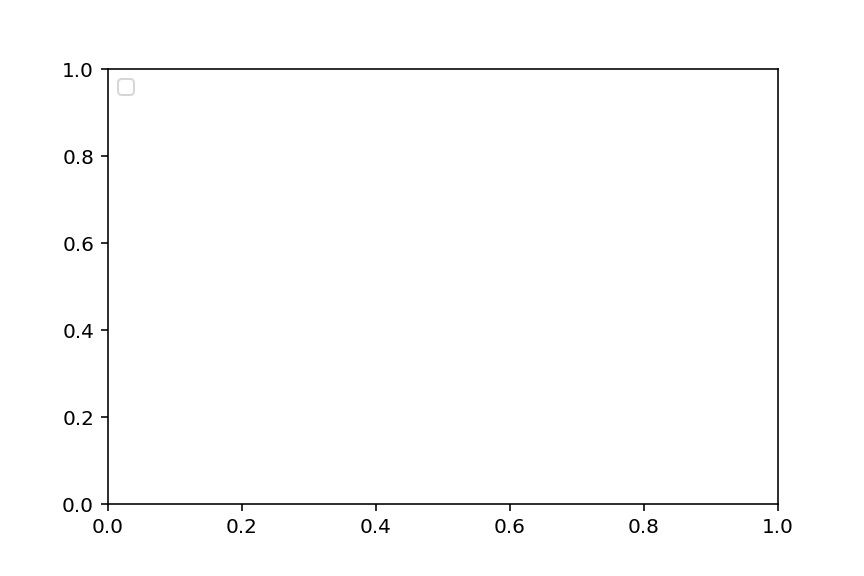

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


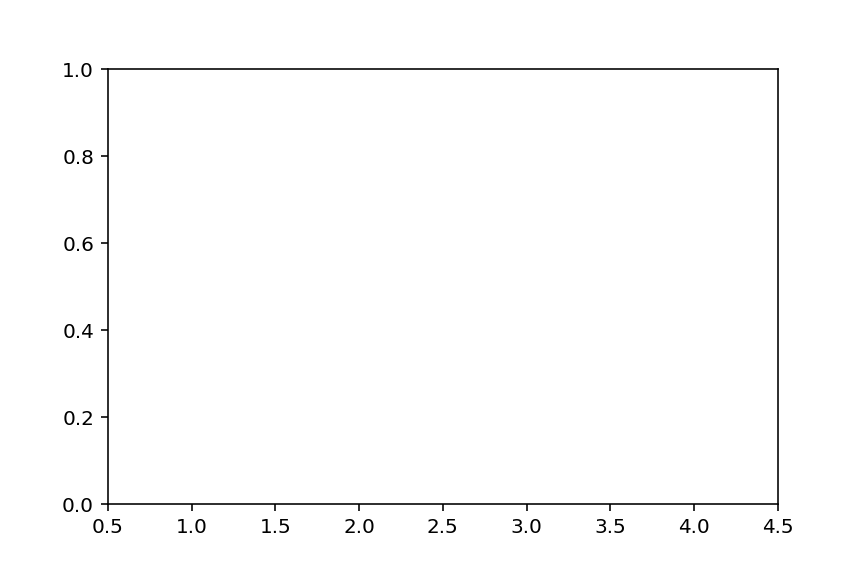

In [27]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [28]:
%matplotlib notebook

<IPython.core.display.Javascript object>


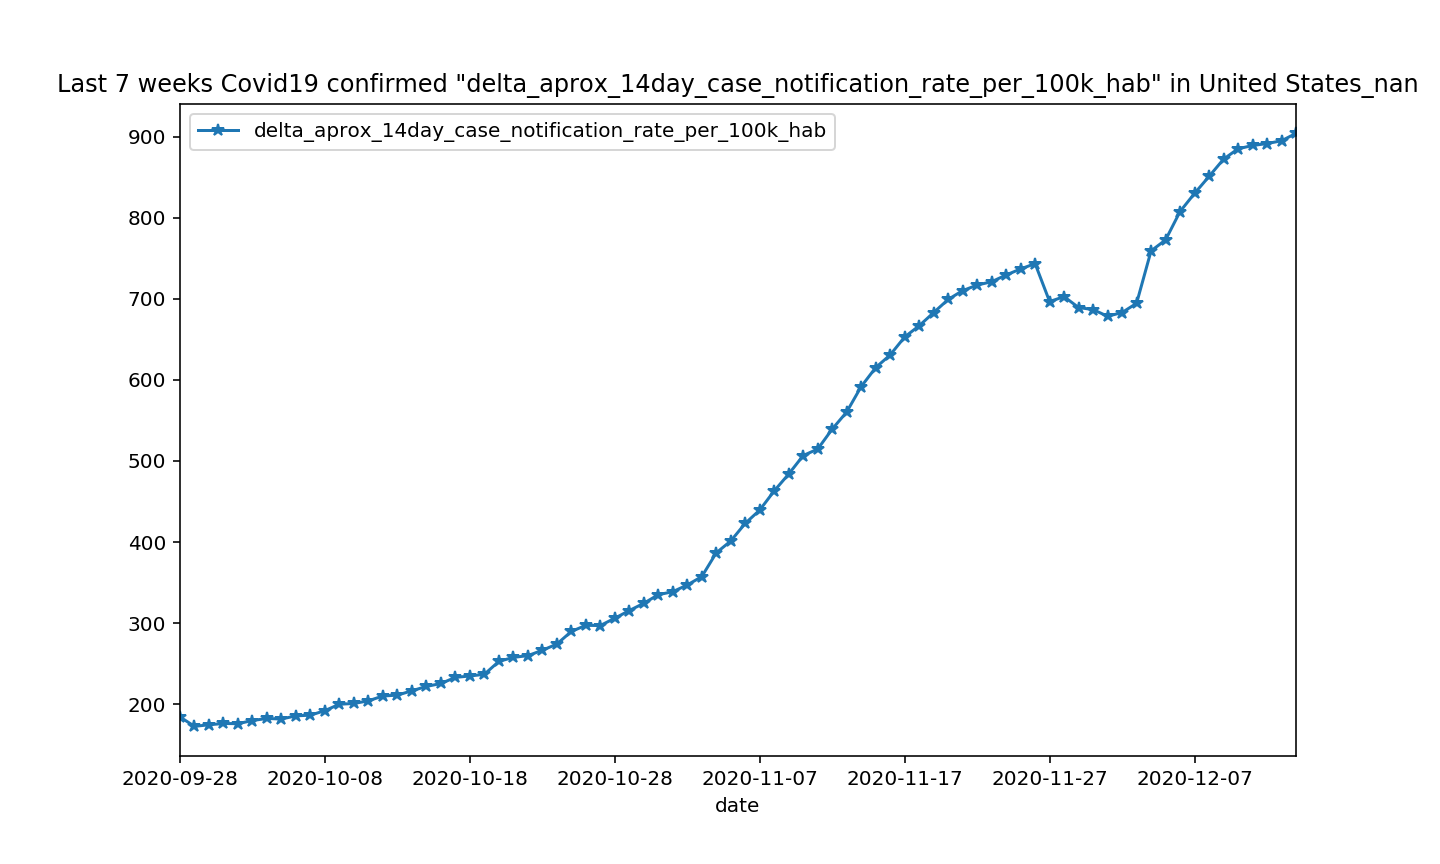

In [29]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


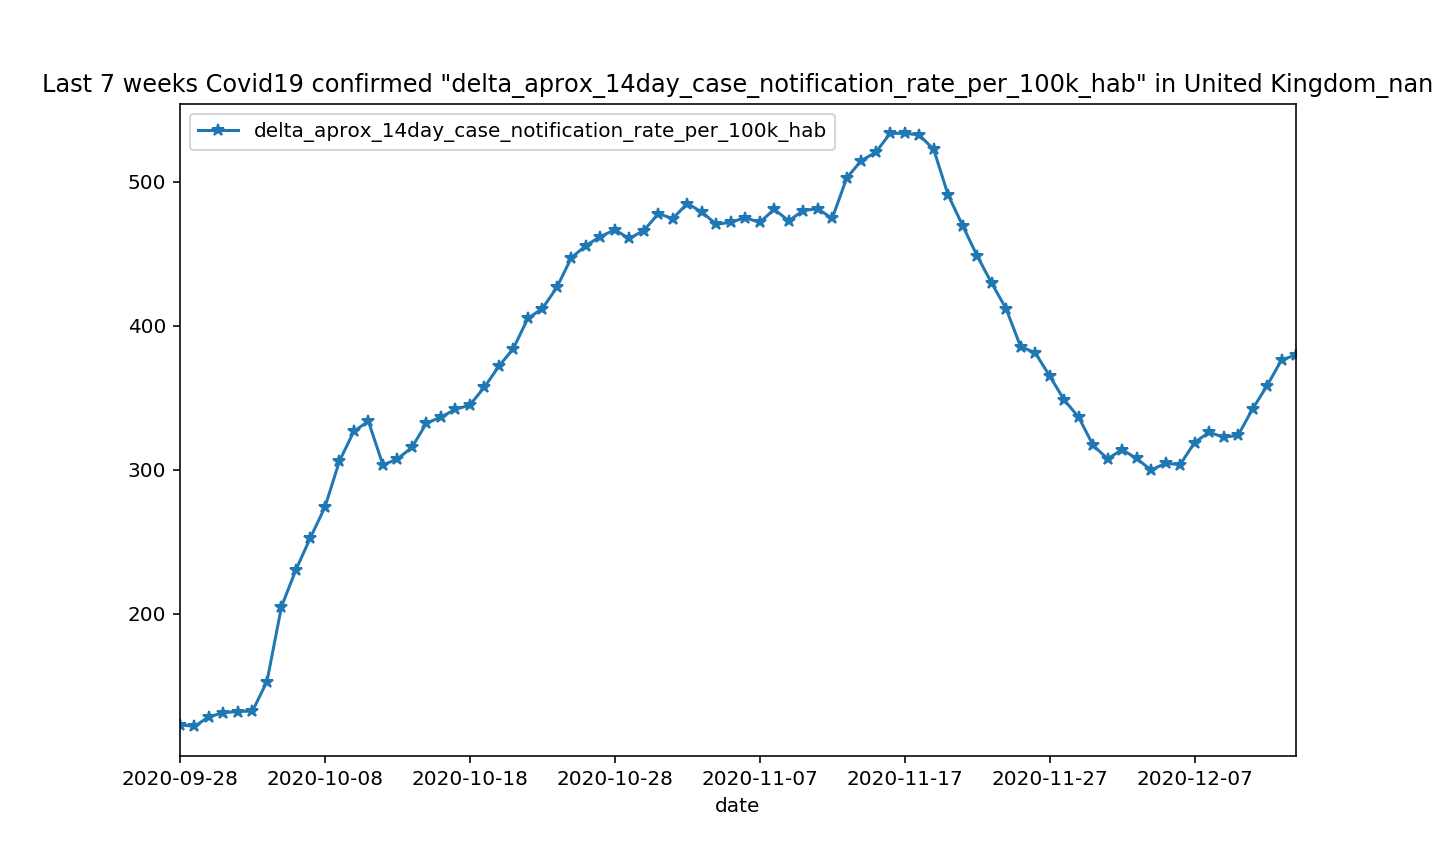

In [30]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


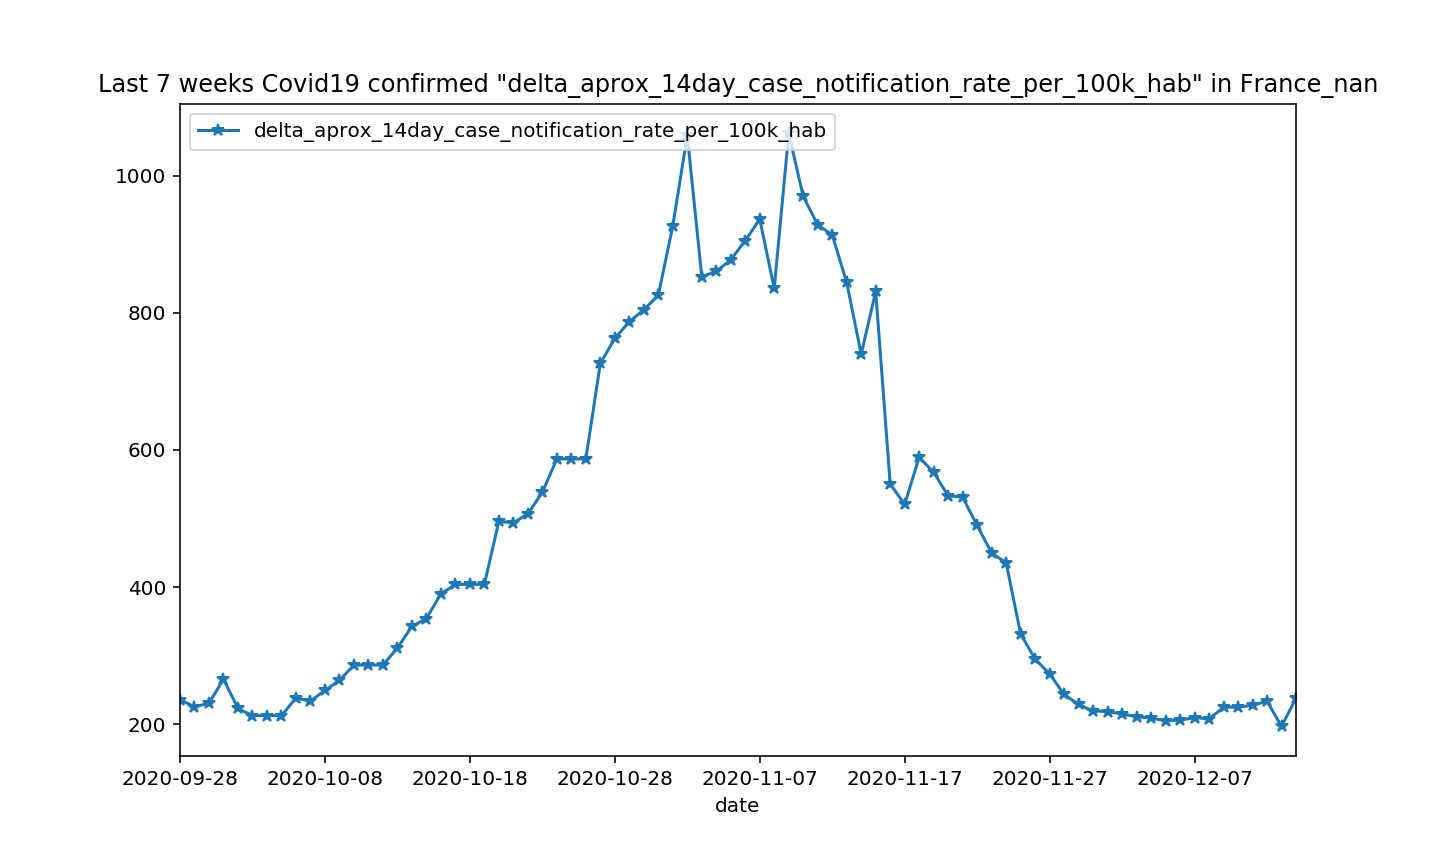

In [31]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


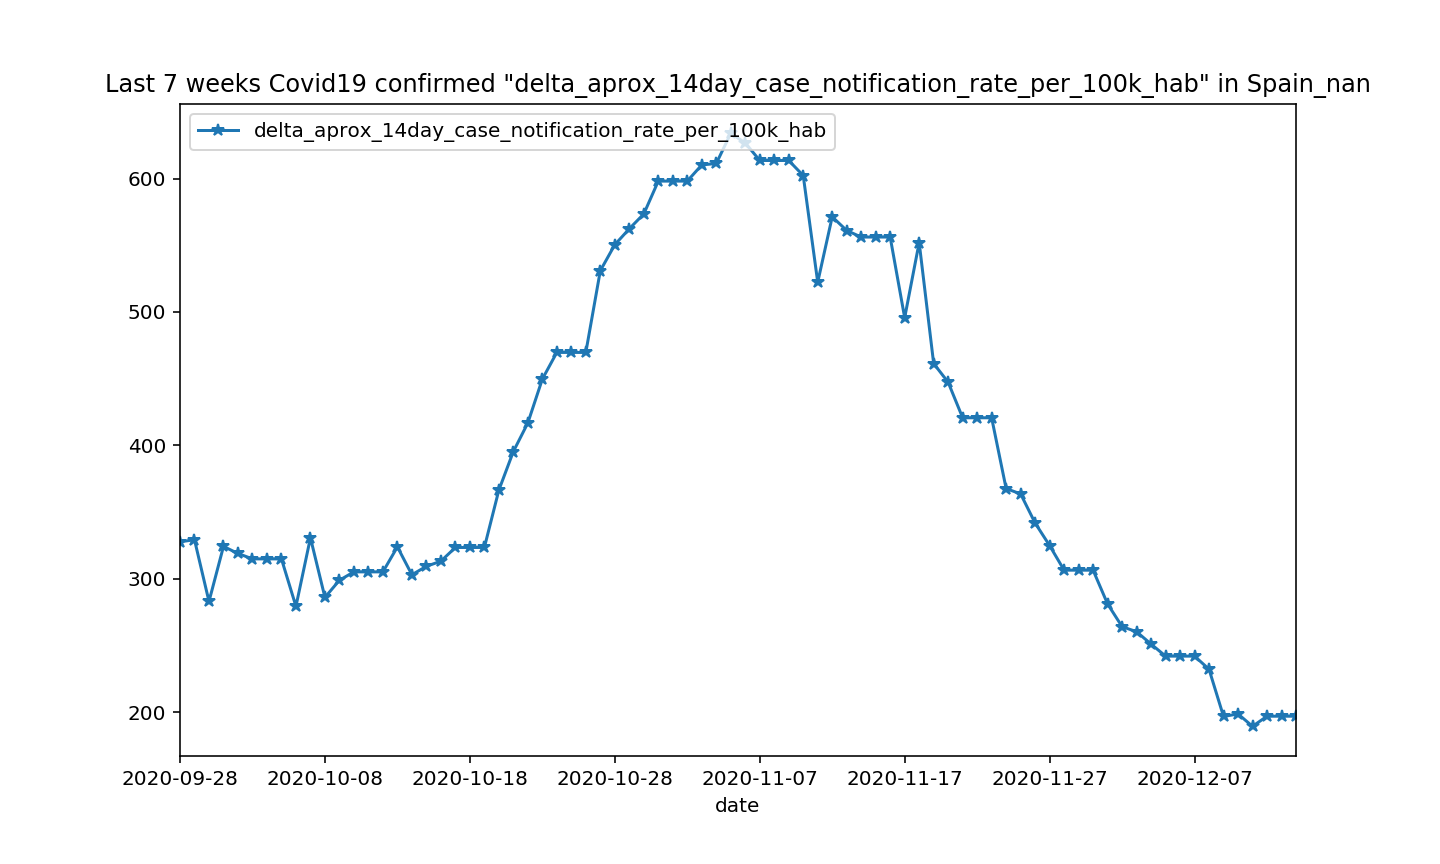

In [32]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


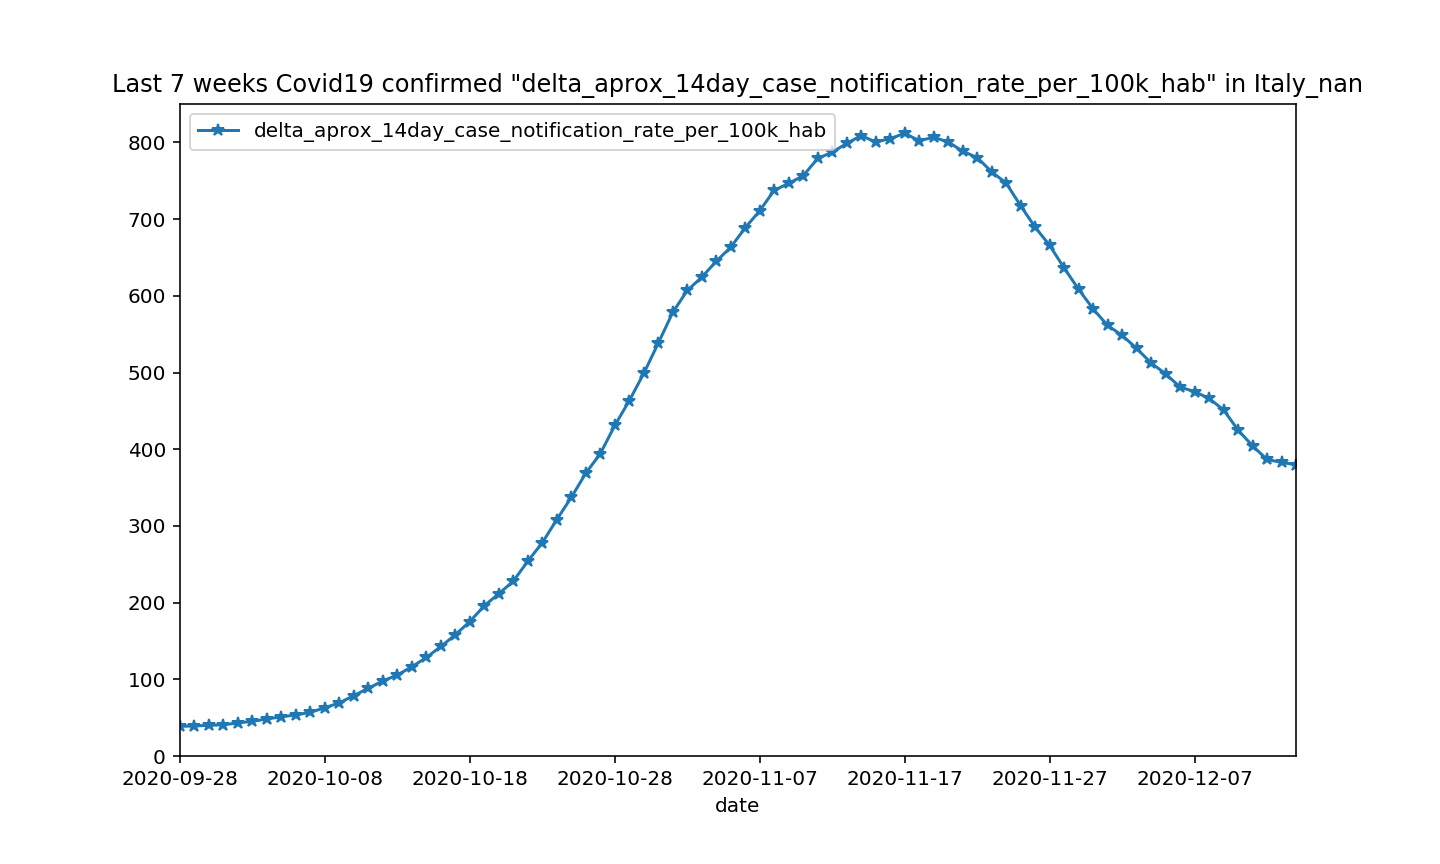

In [33]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


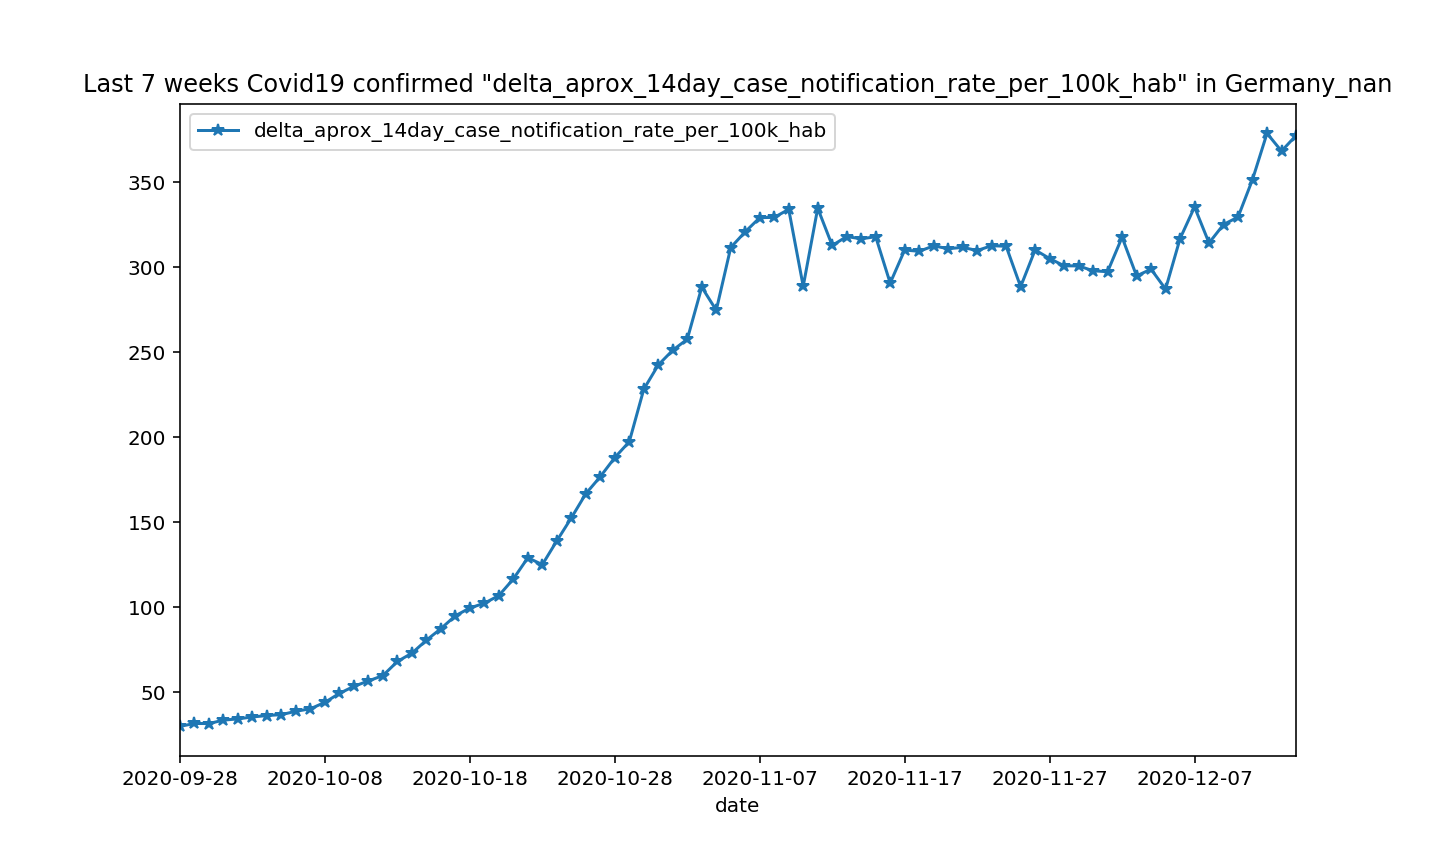

In [34]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


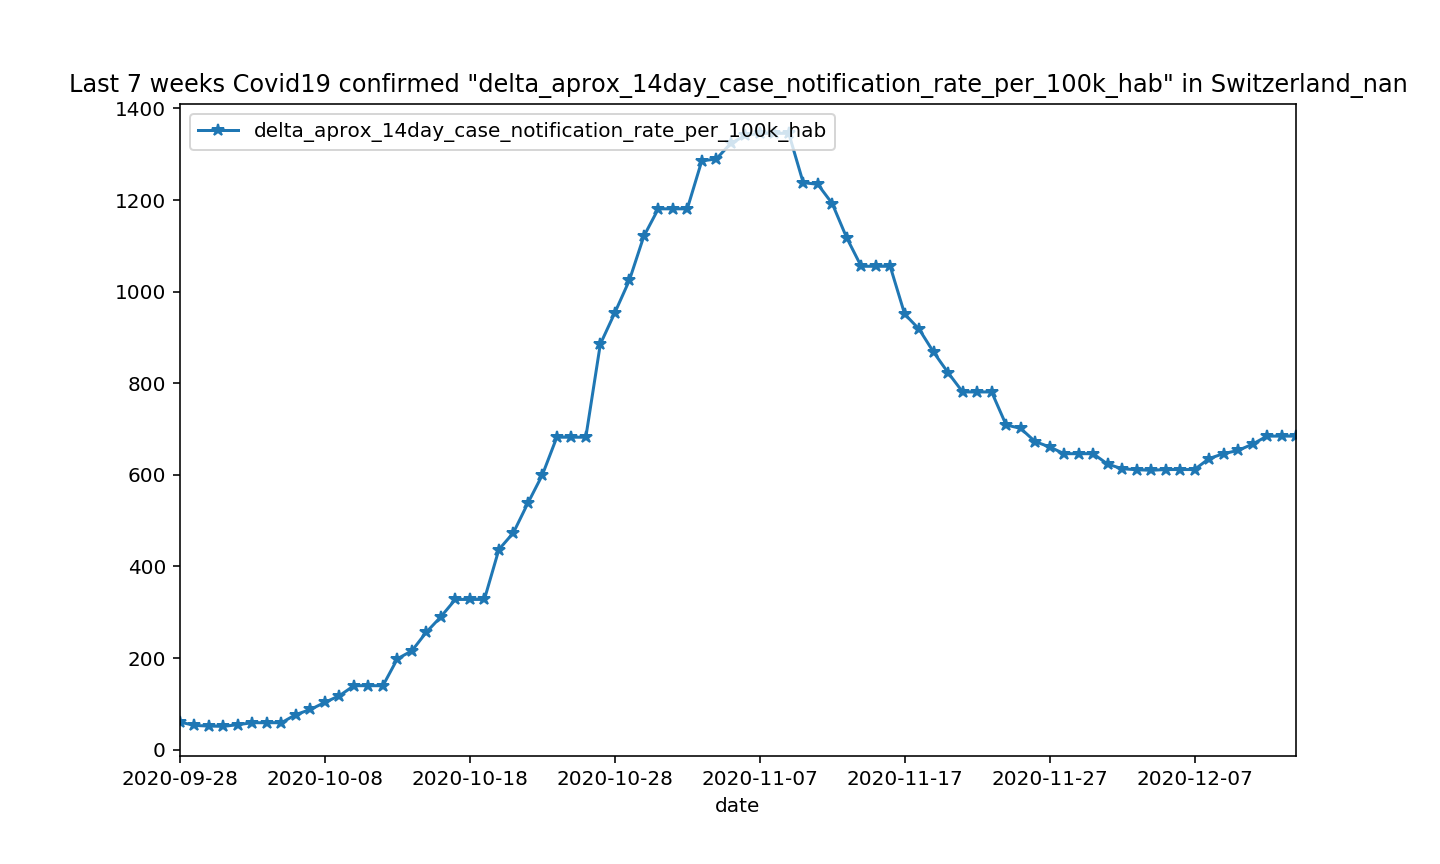

In [35]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


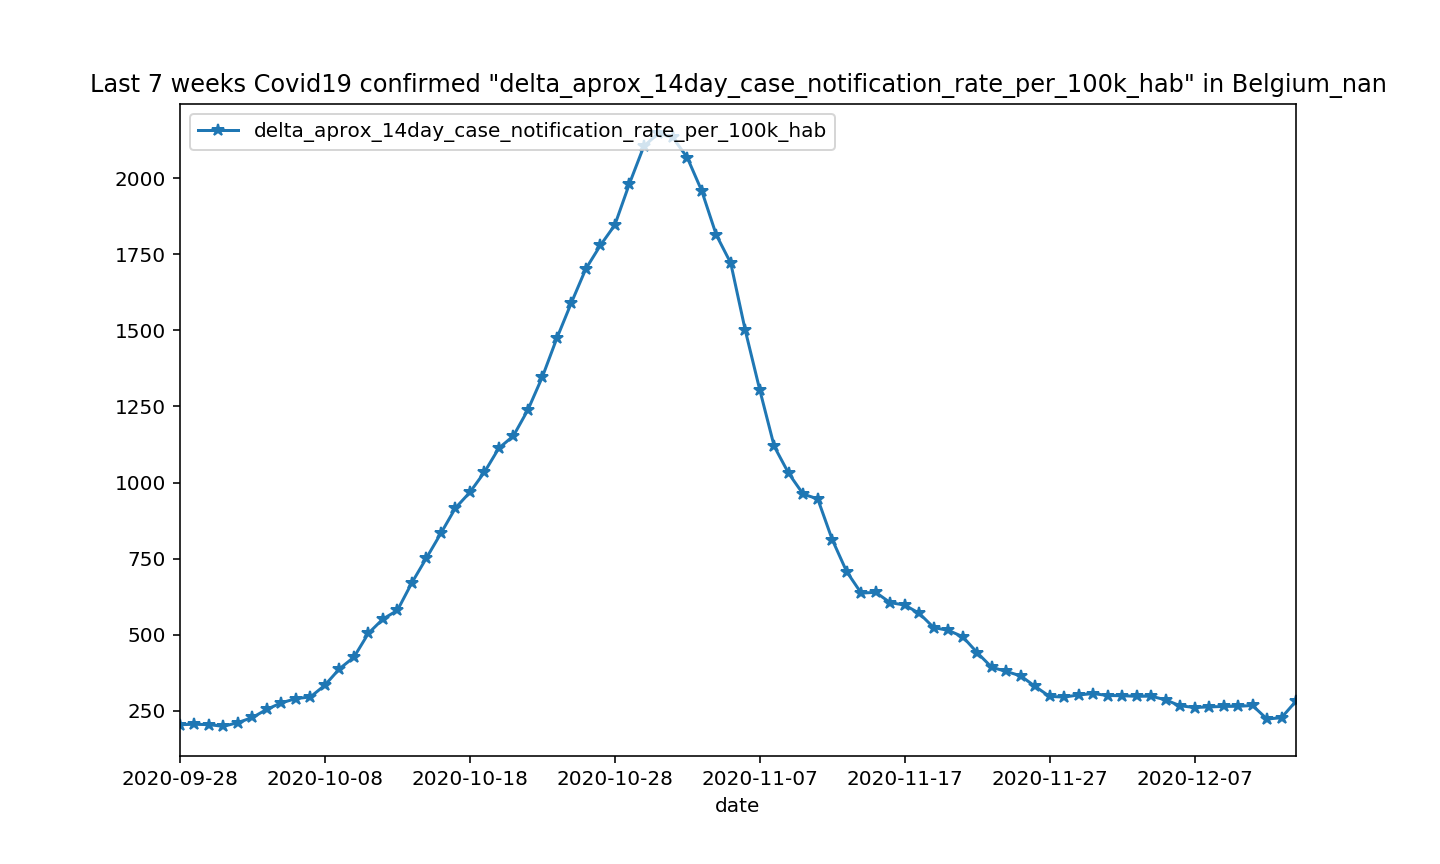

In [36]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


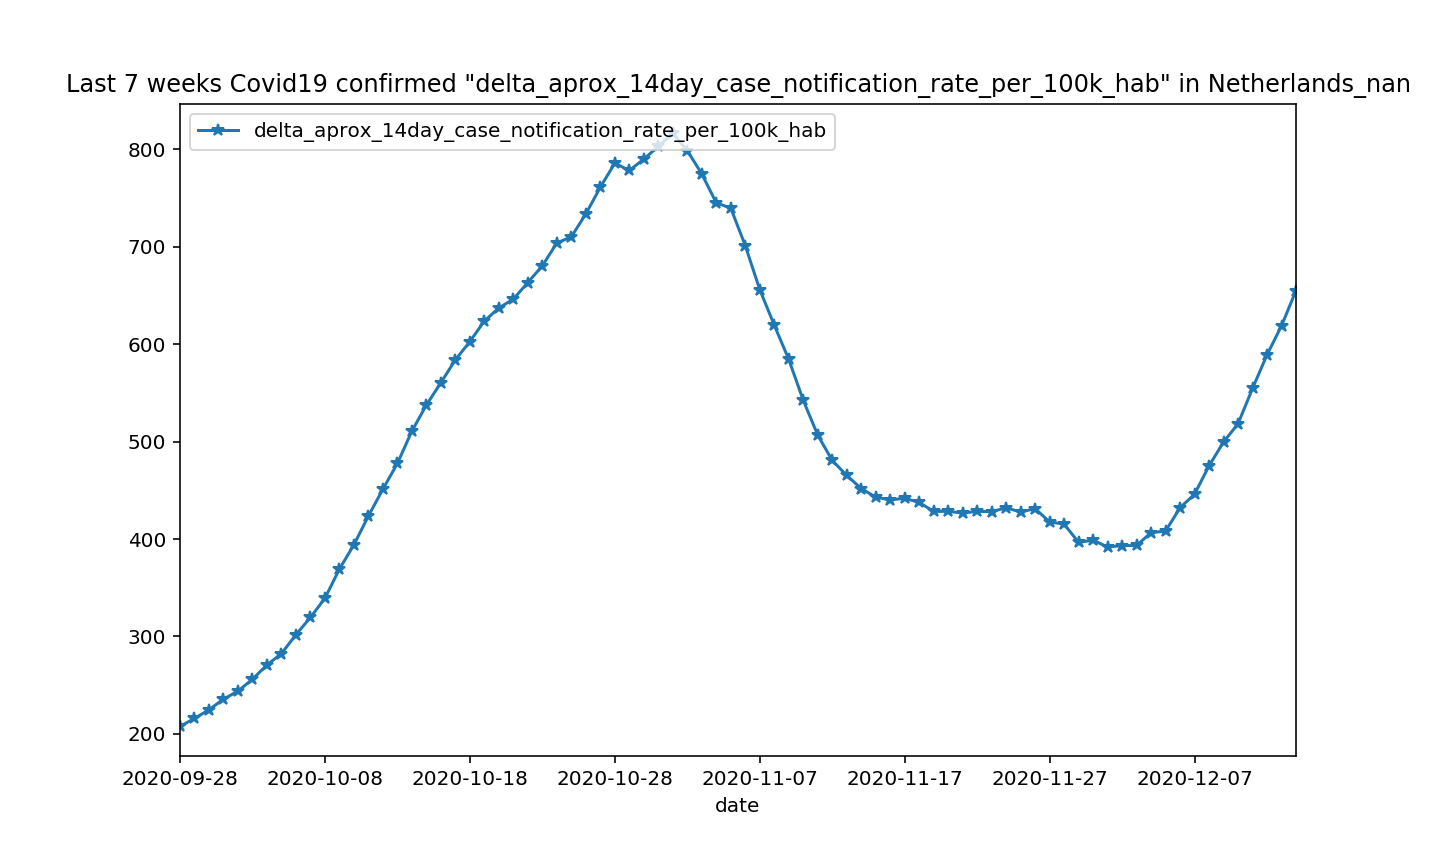

In [37]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


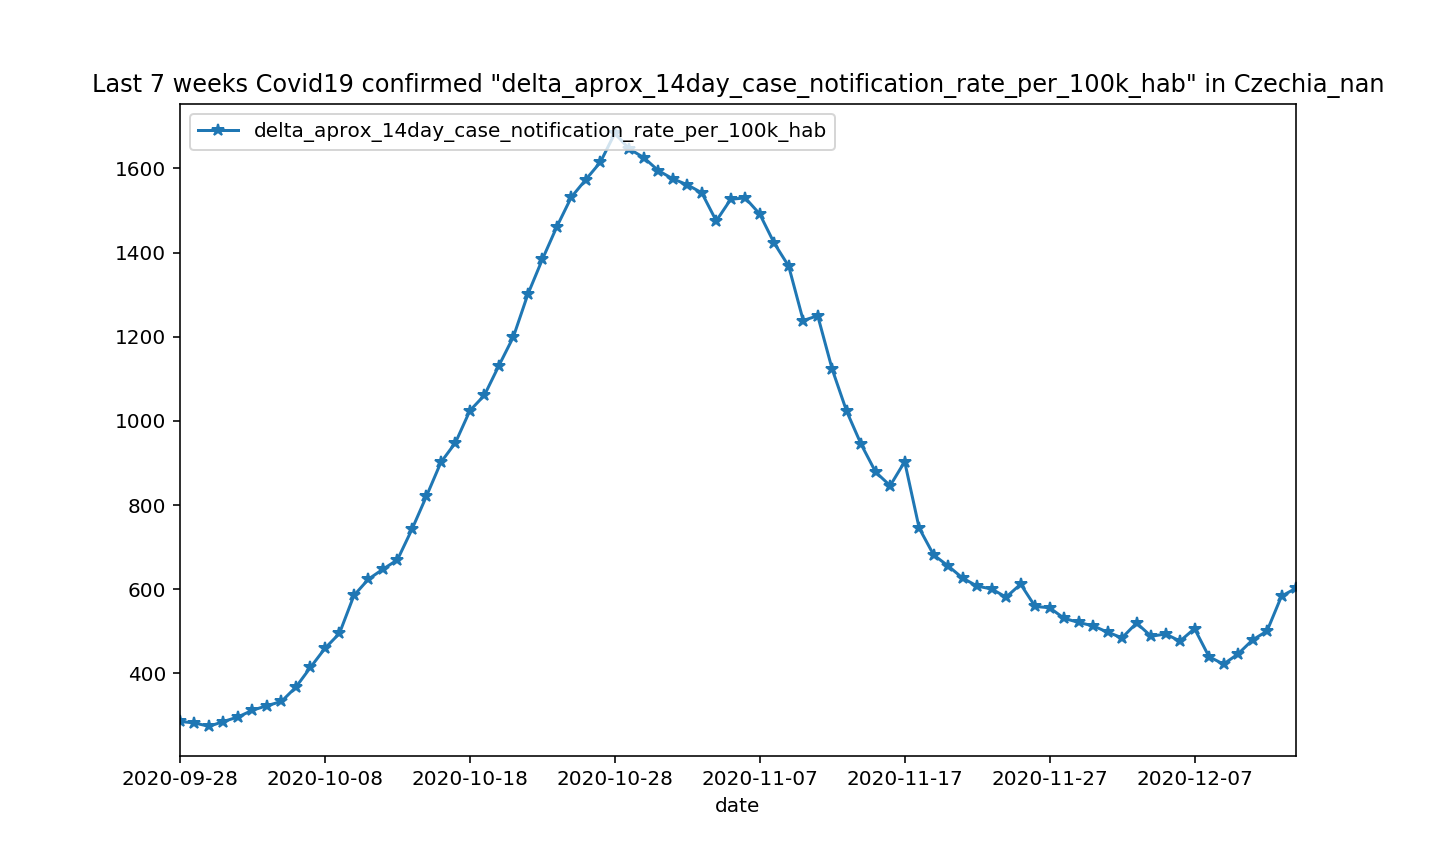

In [38]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


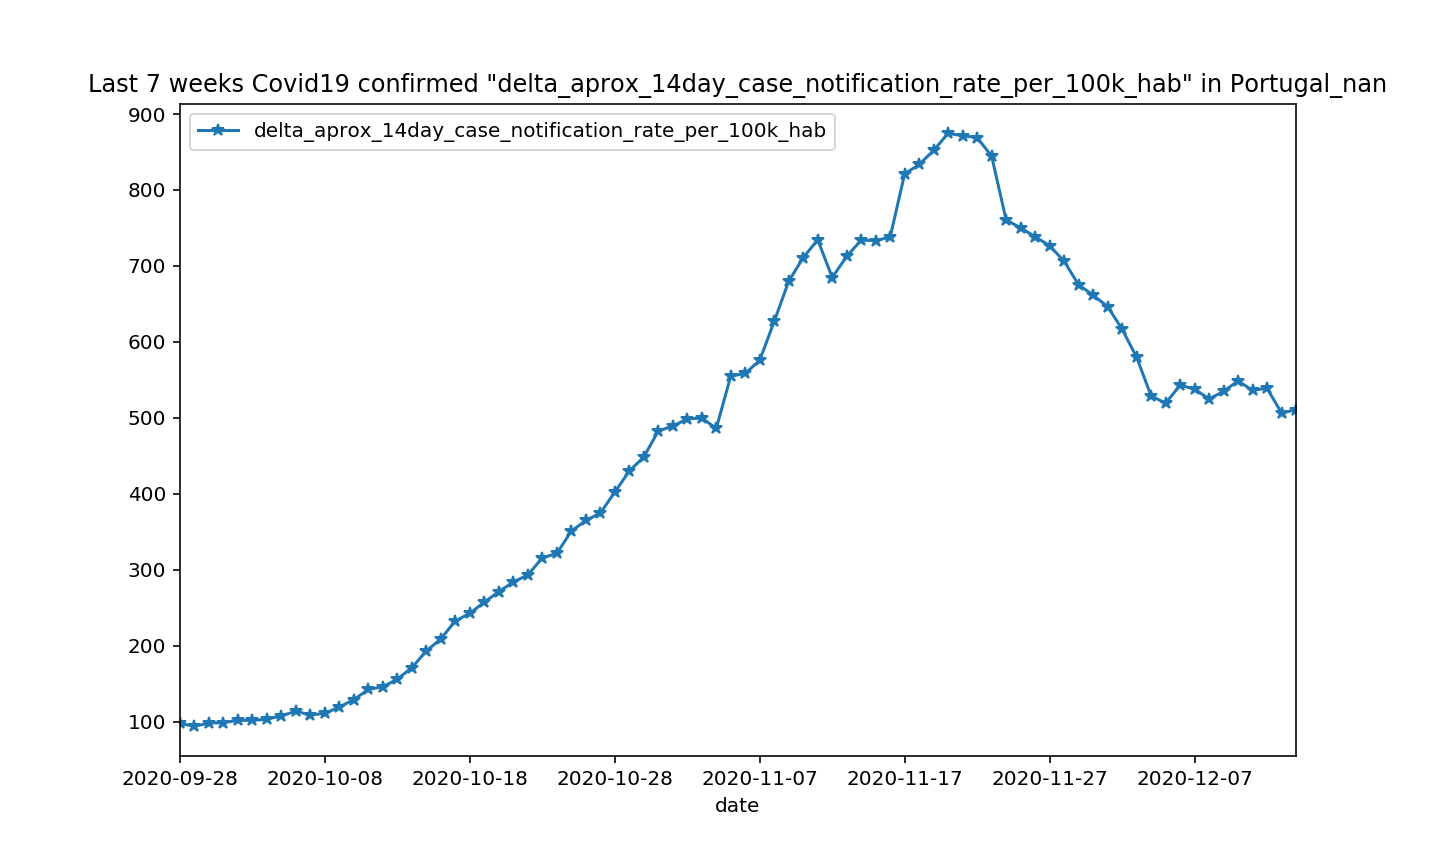

In [39]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [40]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


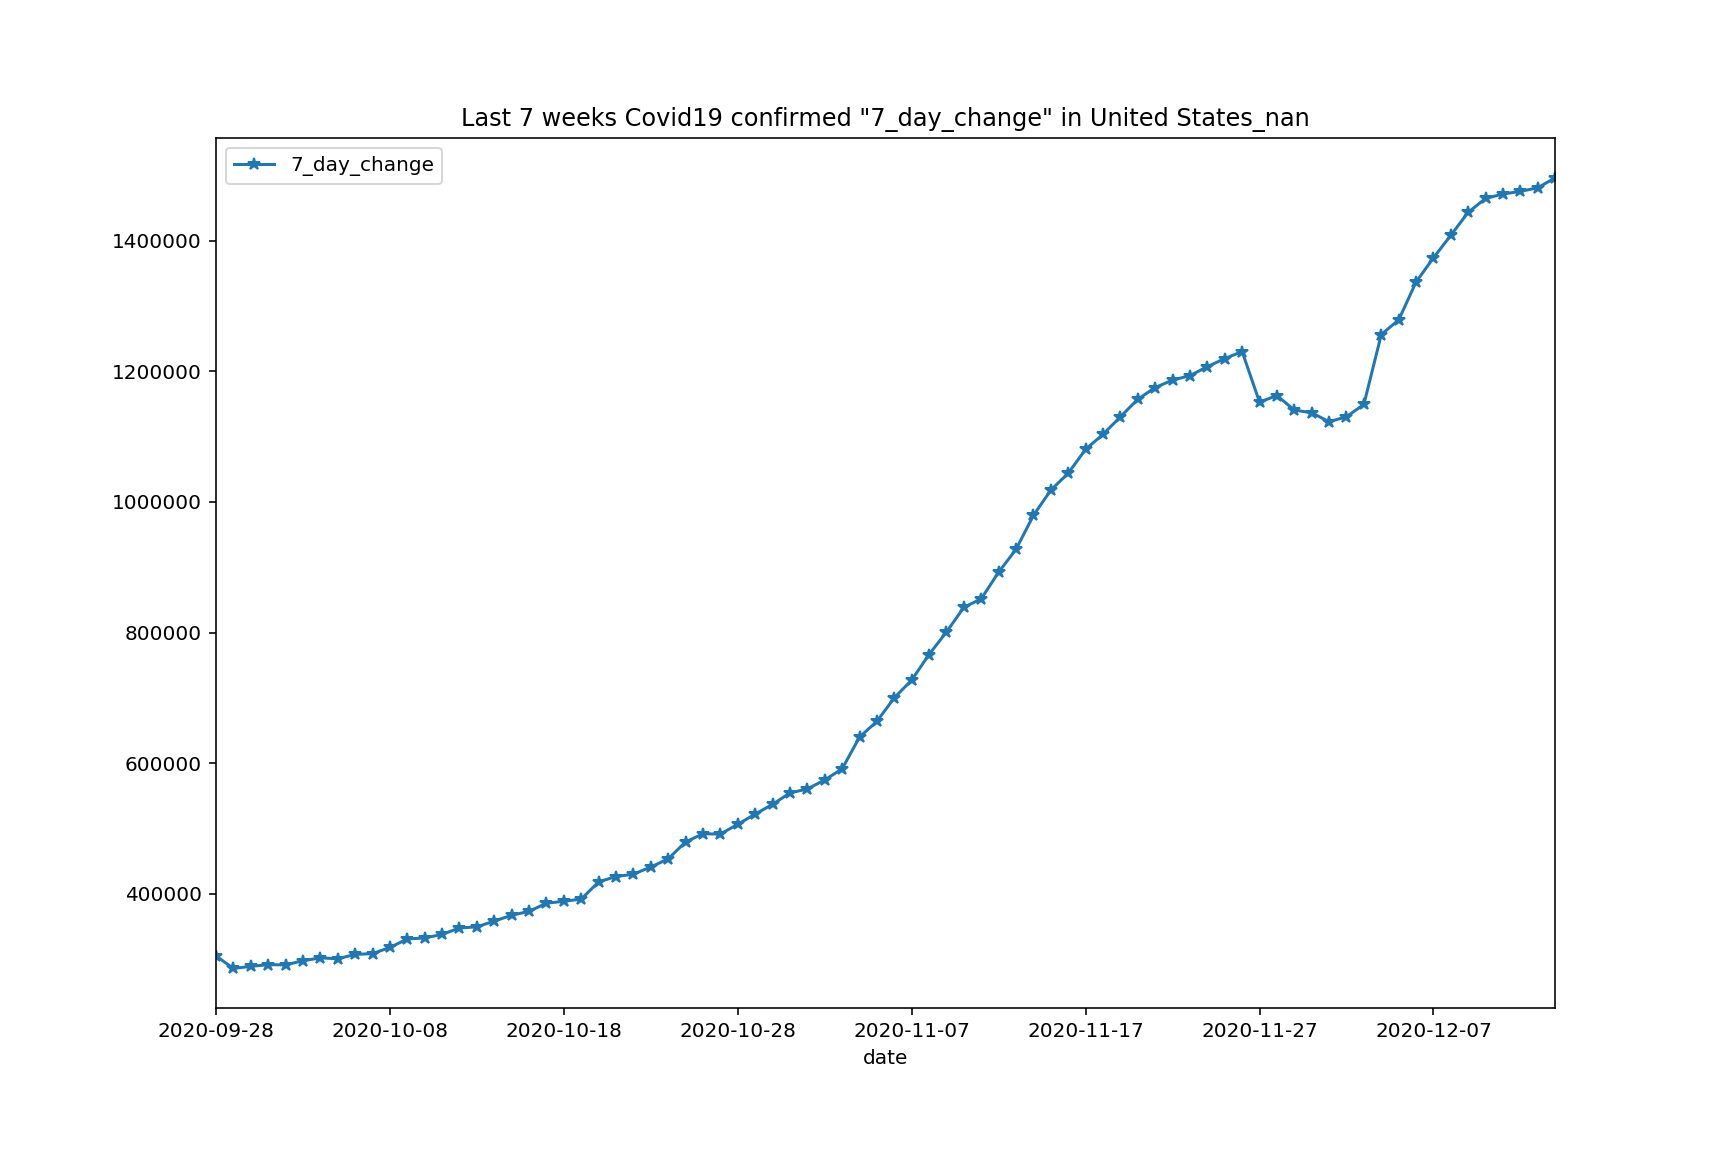

In [41]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


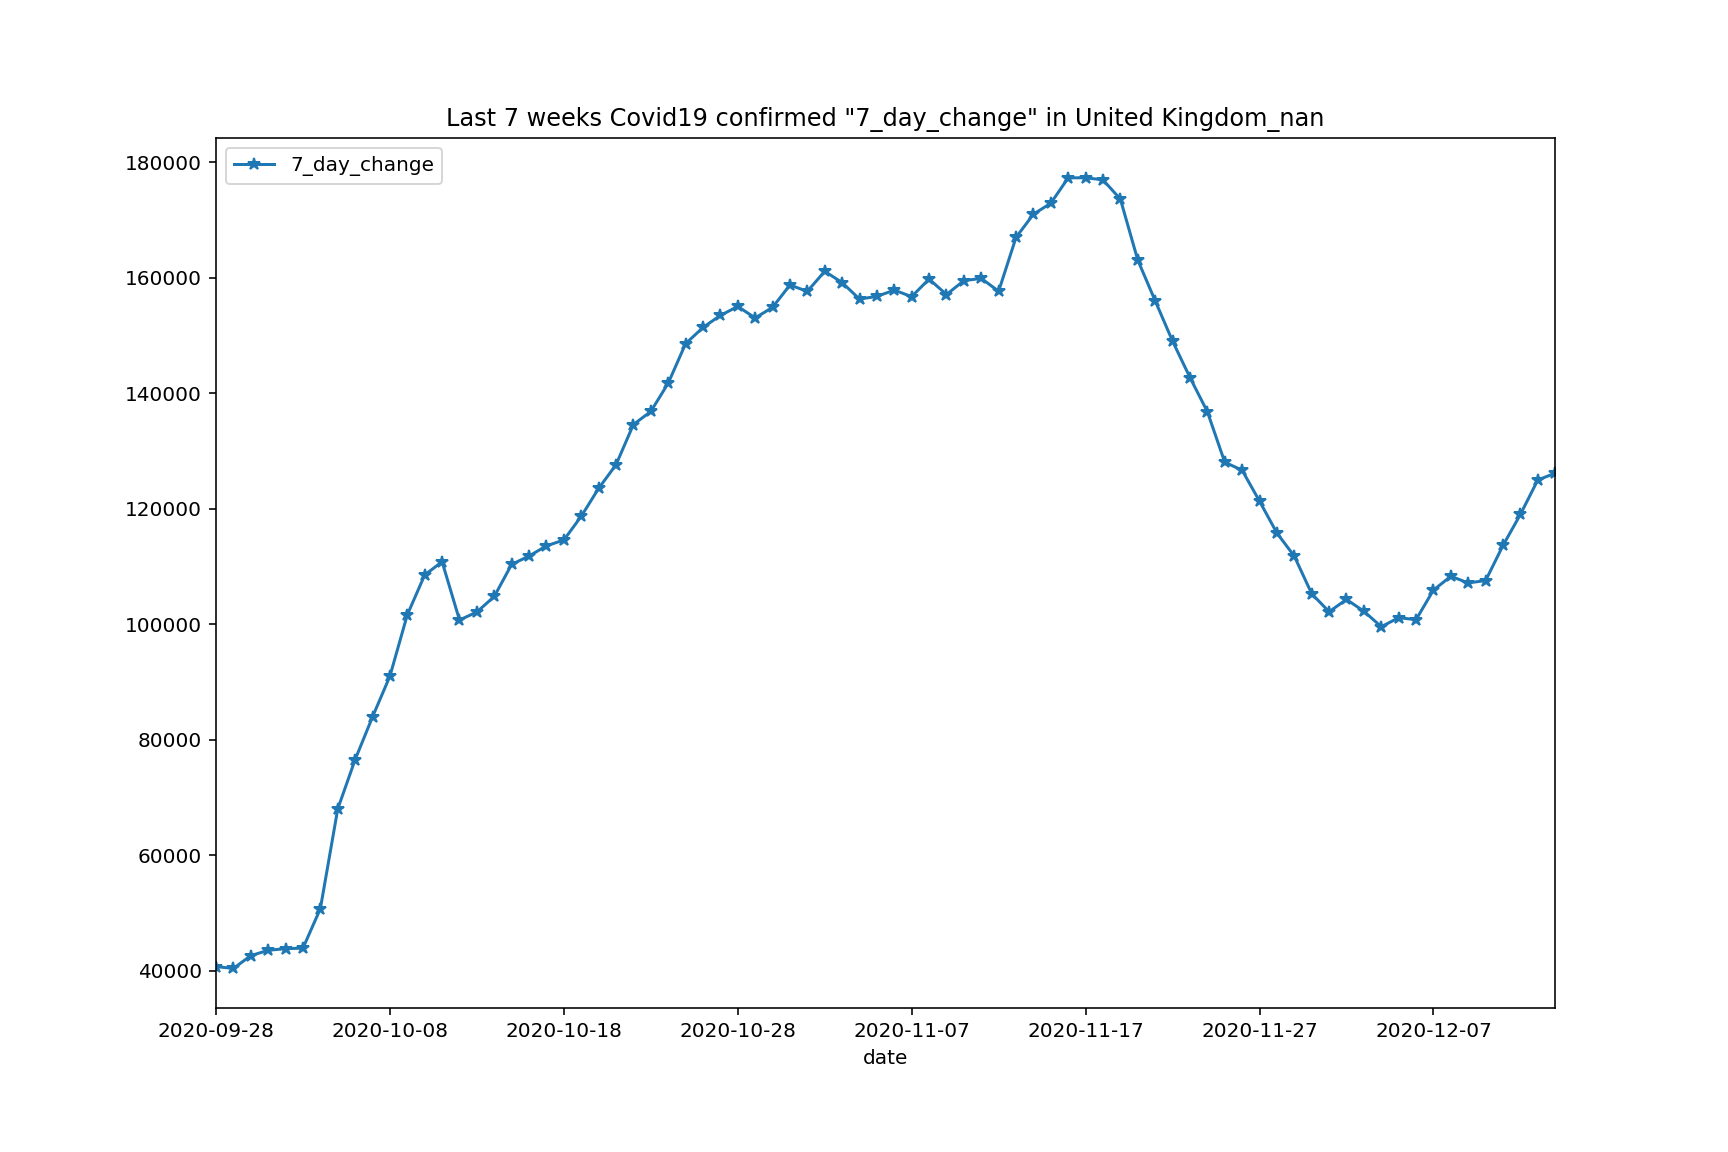

In [42]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


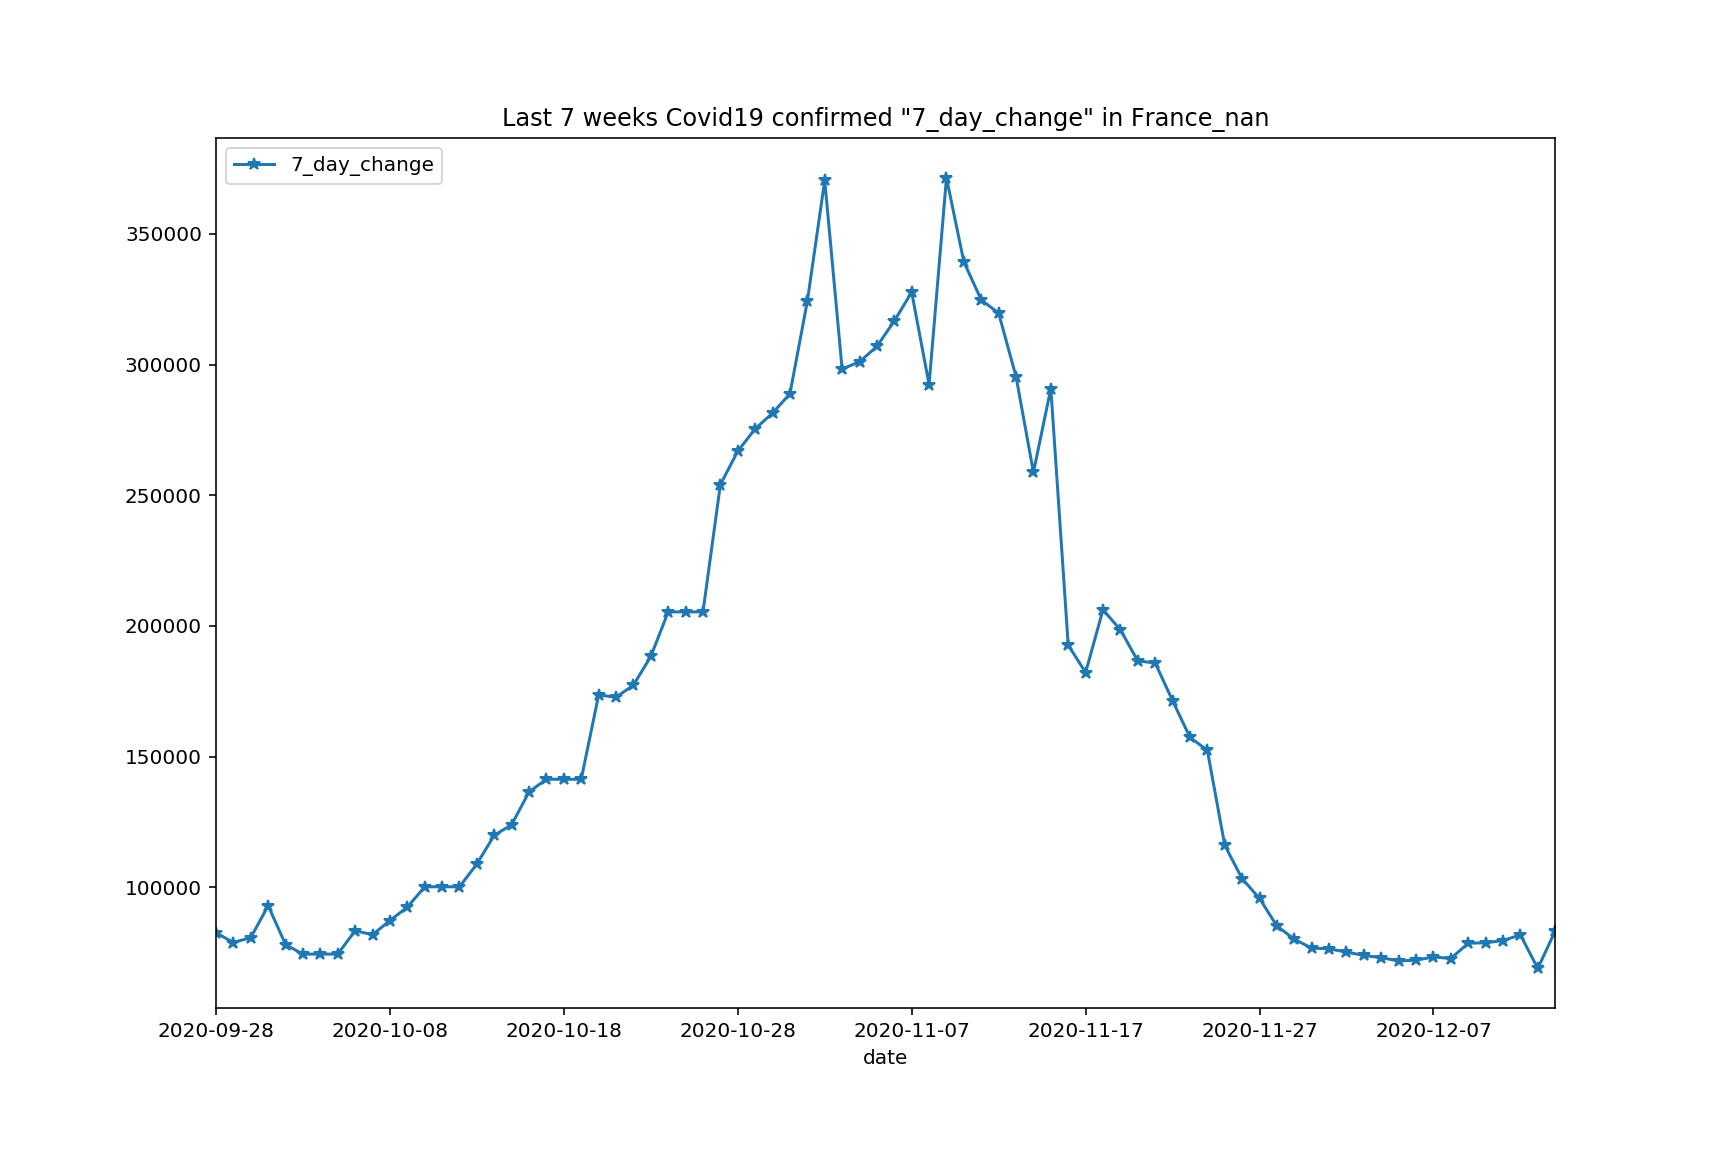

In [43]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


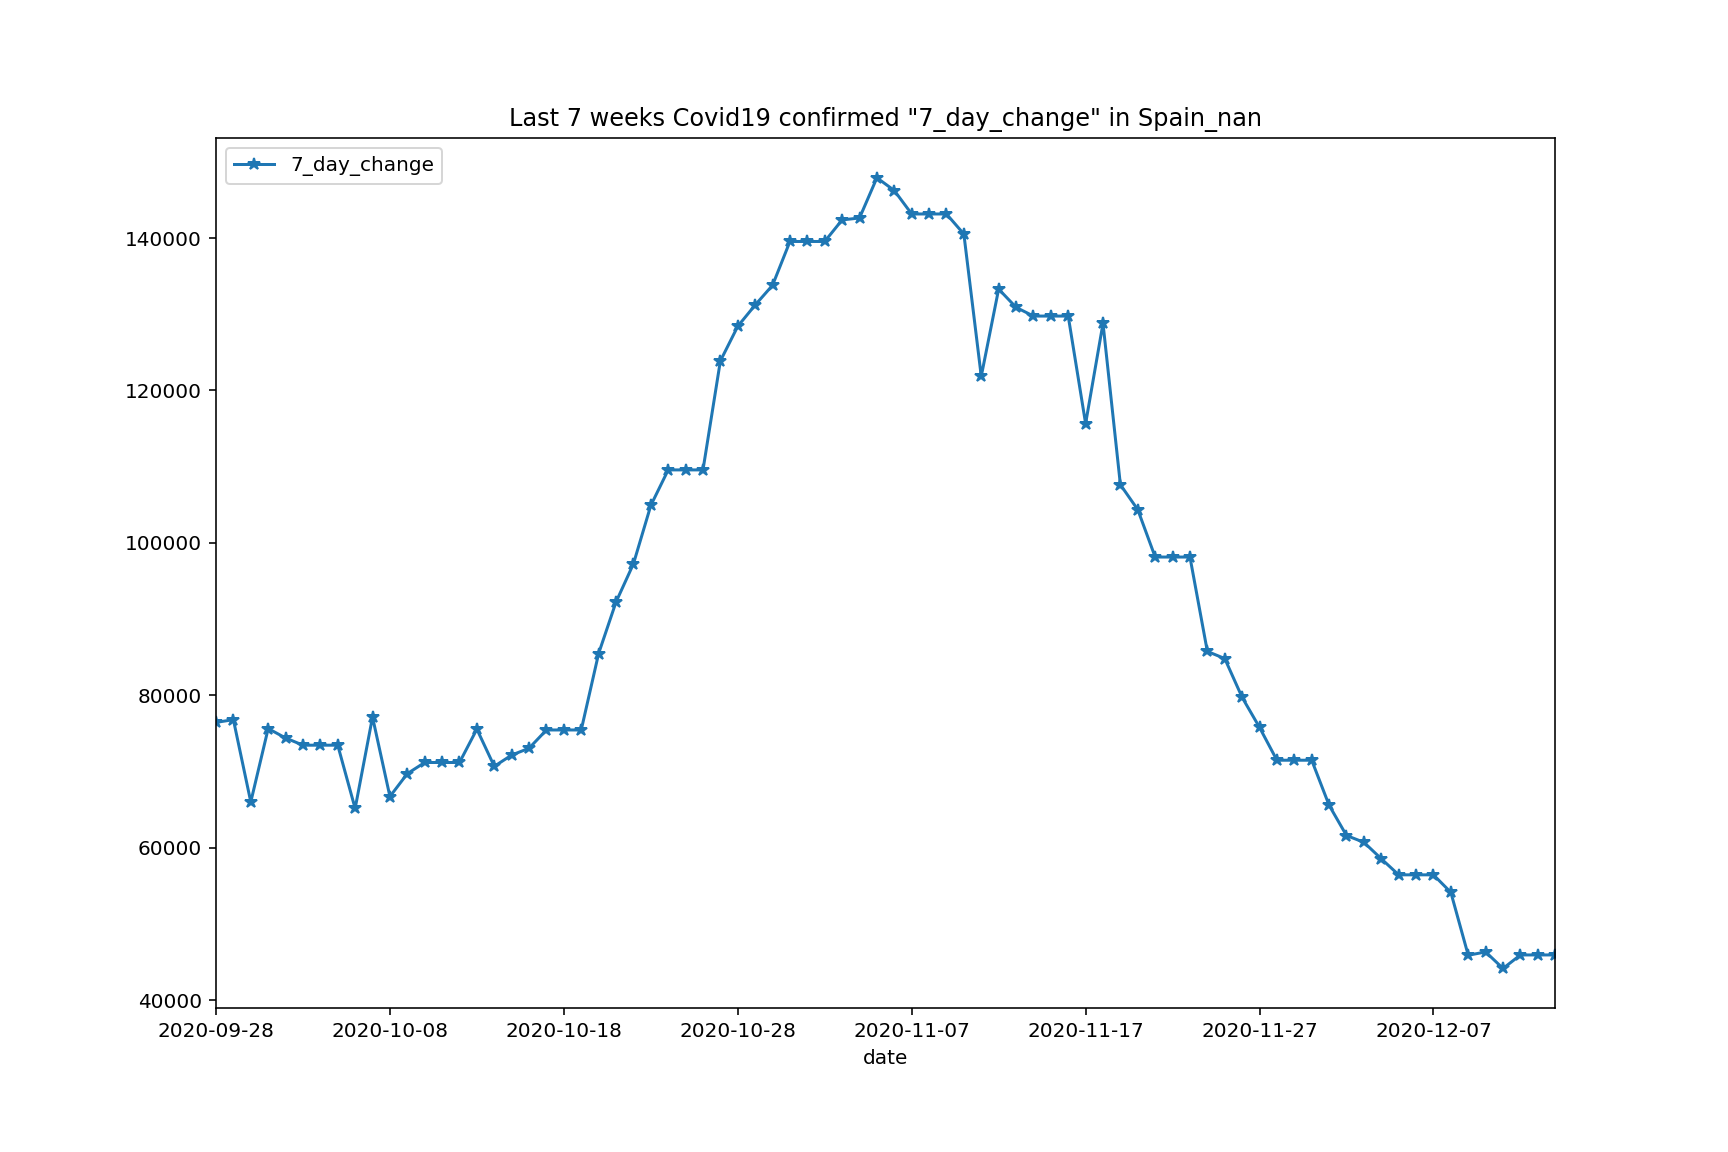

In [44]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


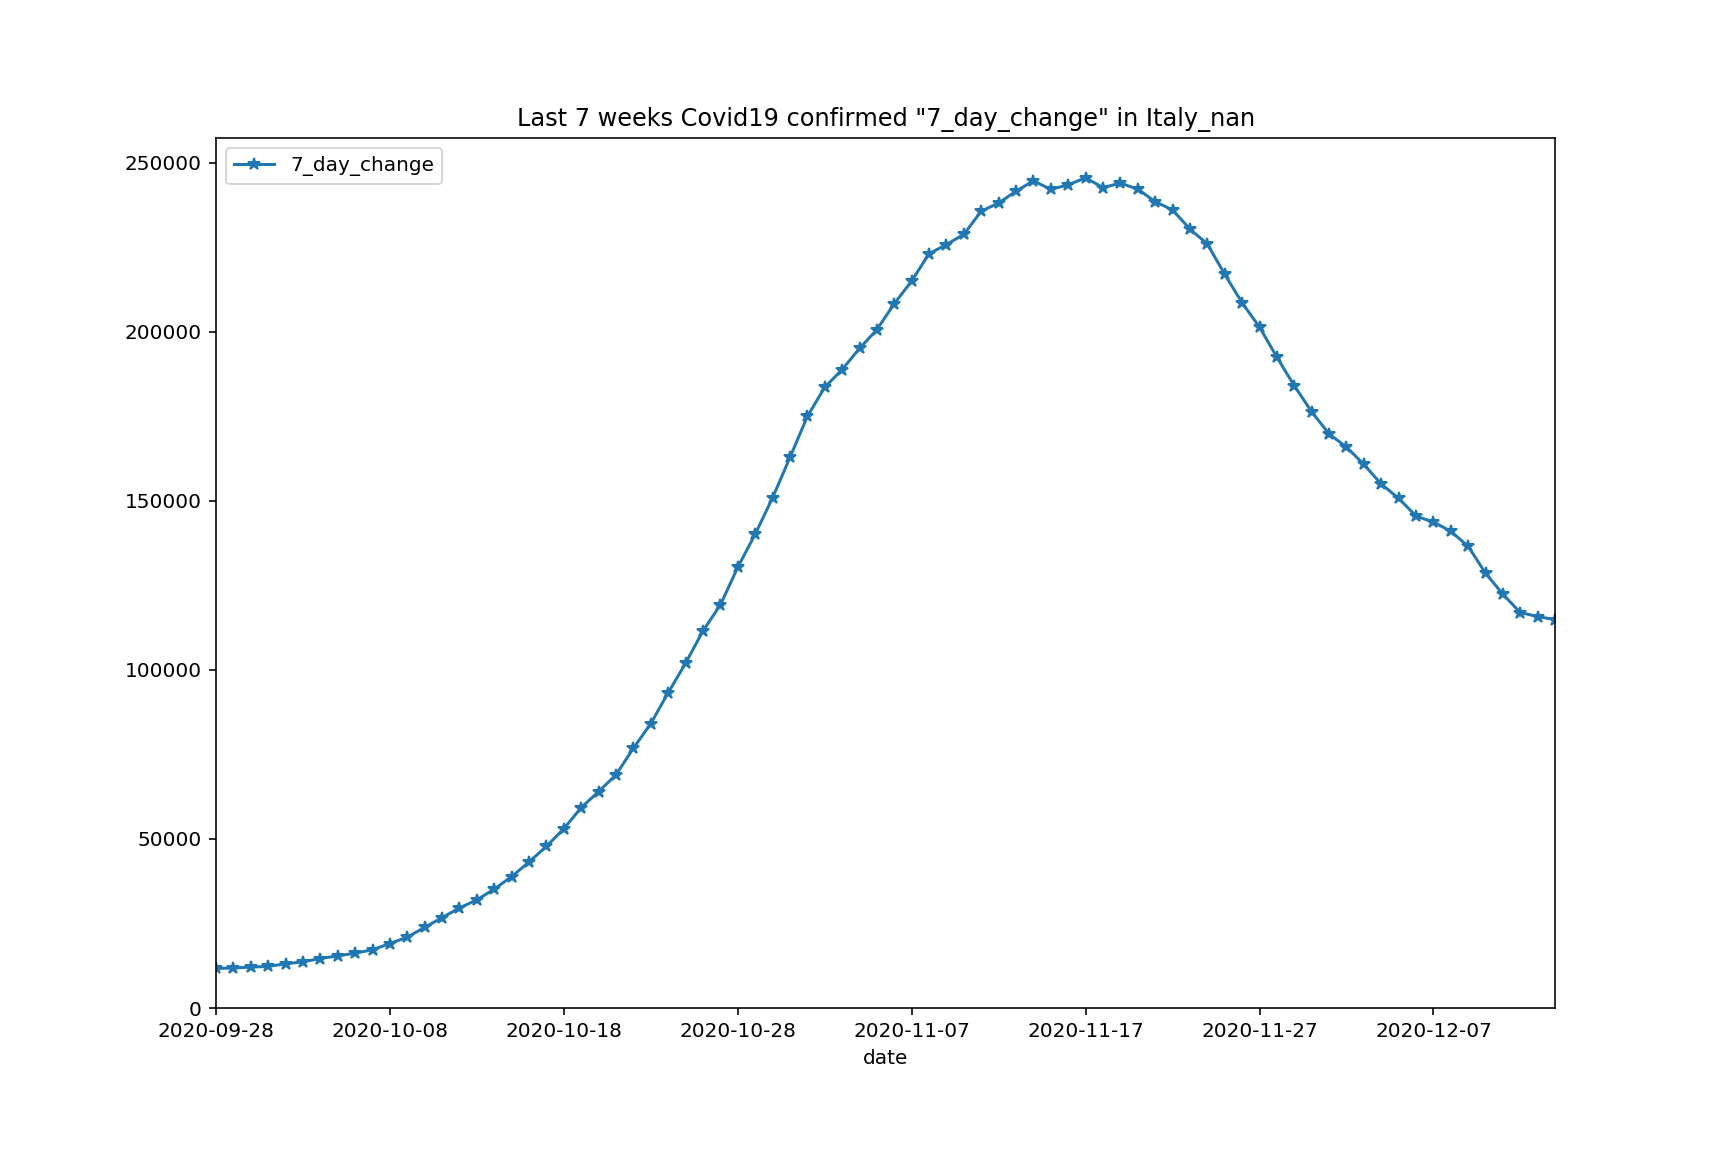

In [45]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


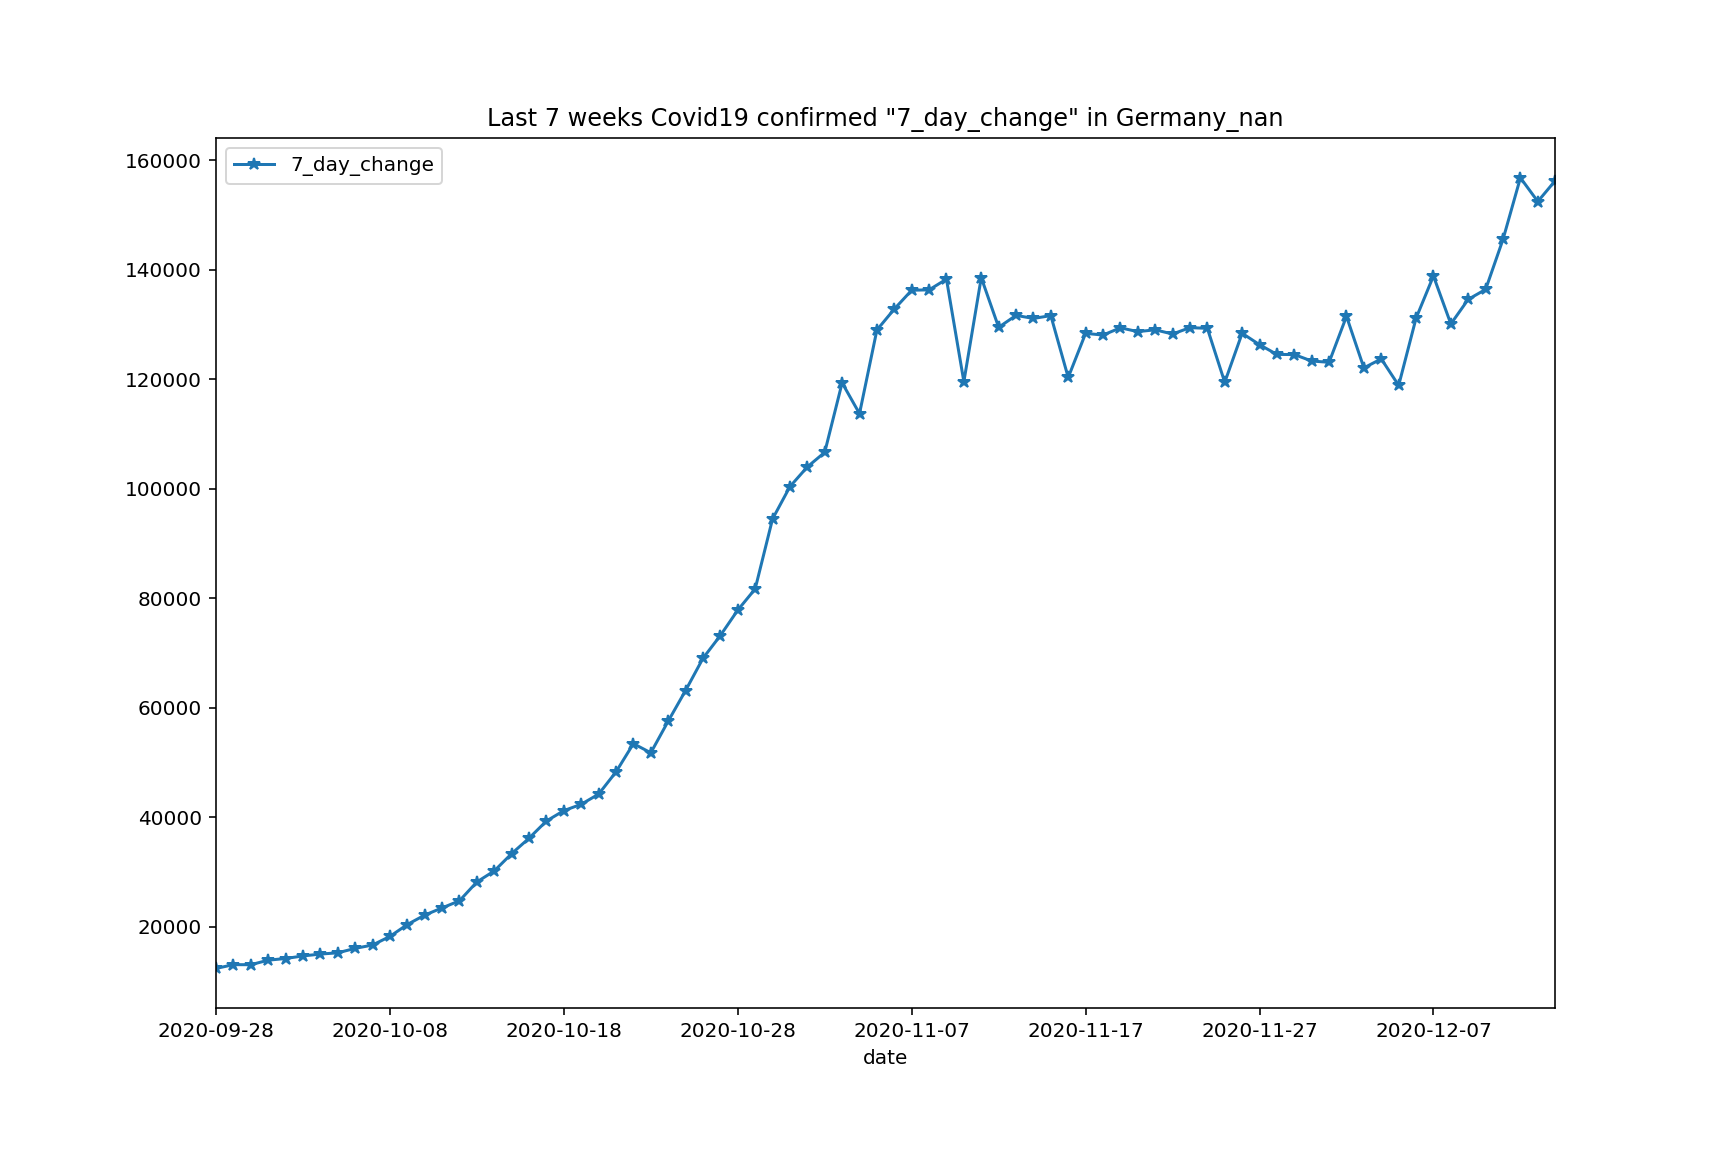

In [46]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


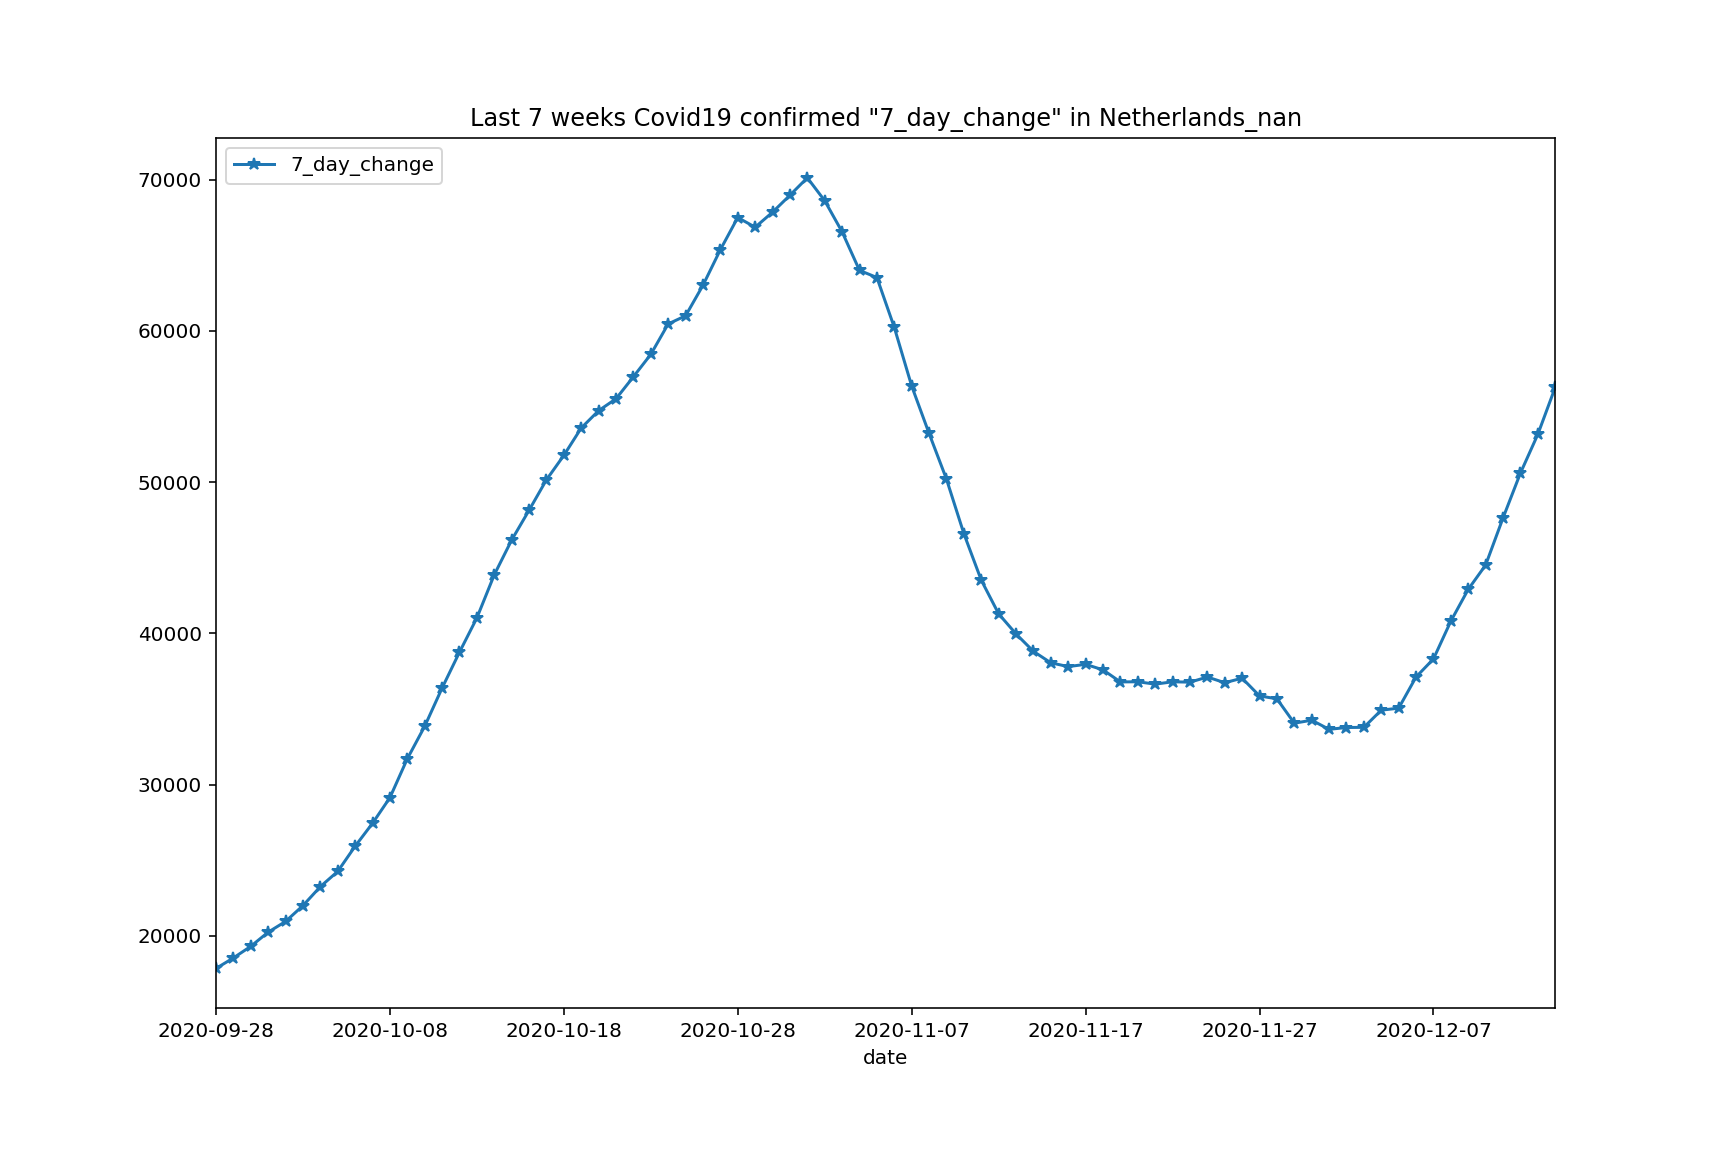

In [47]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


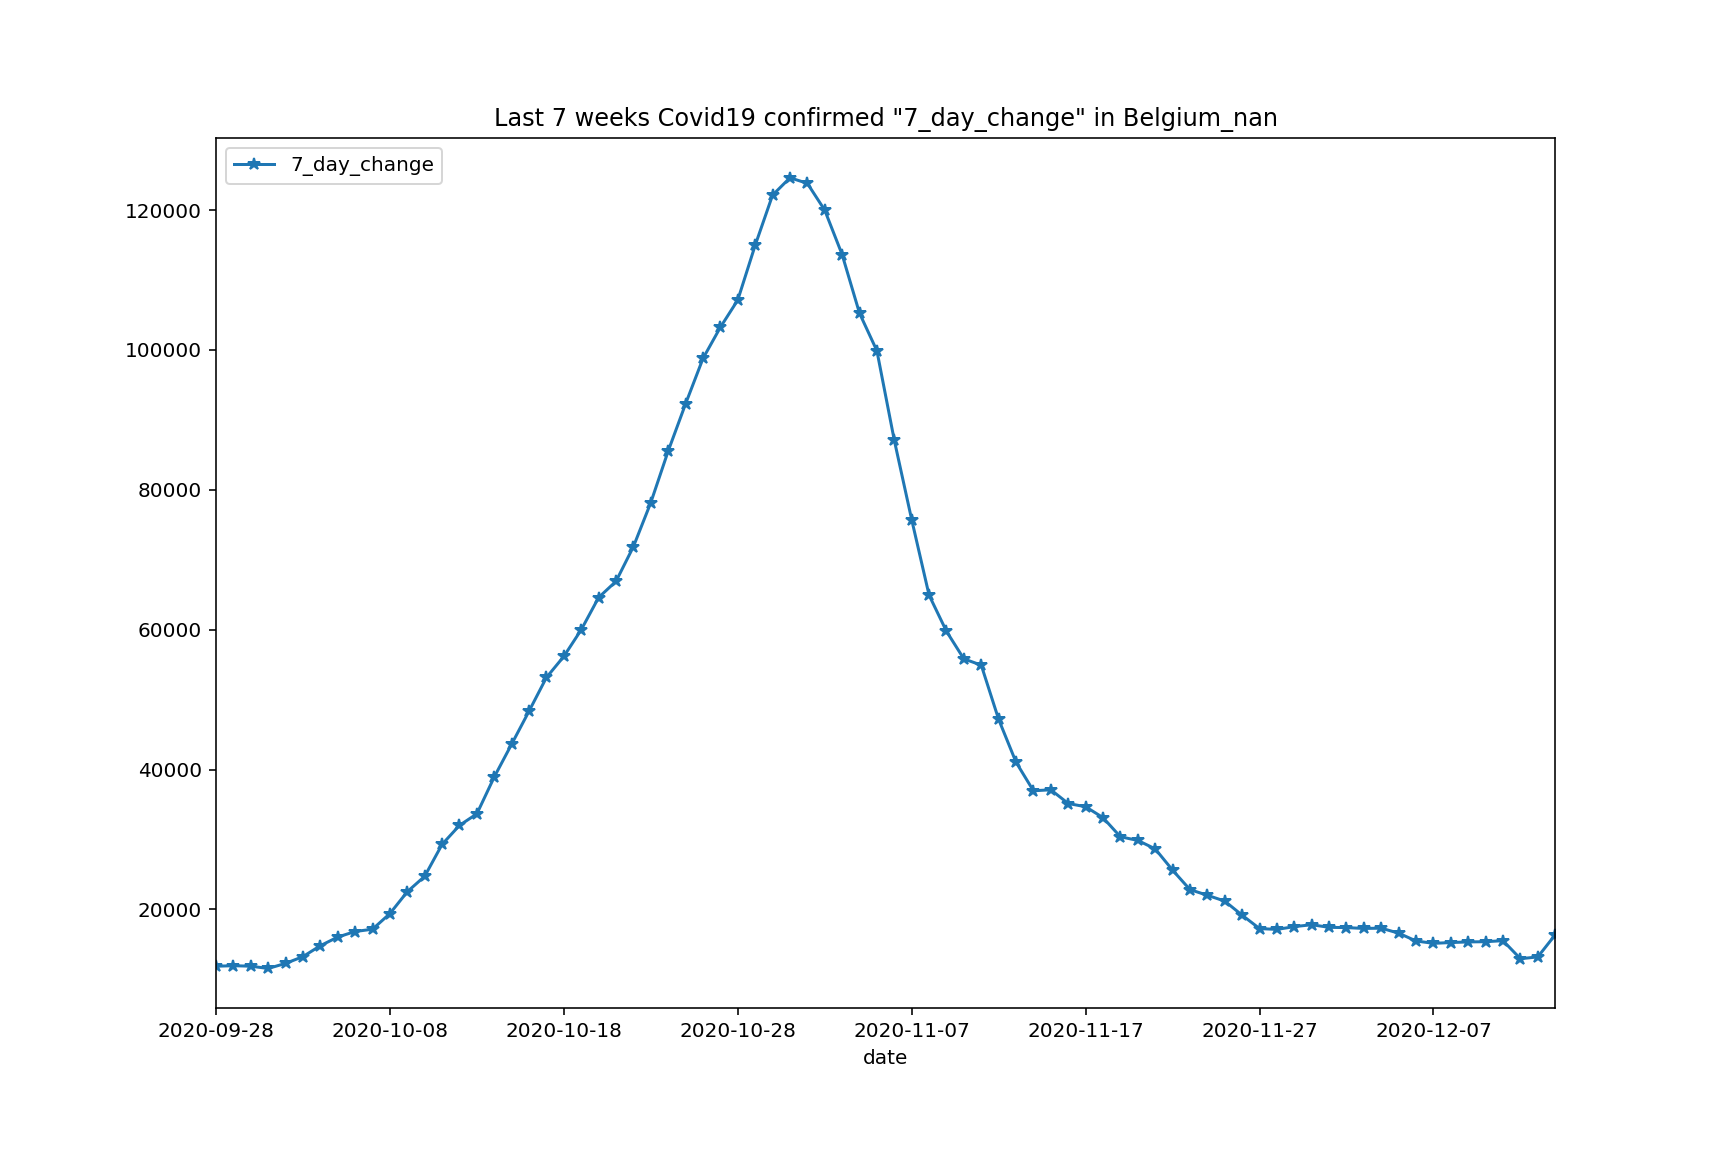

In [48]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


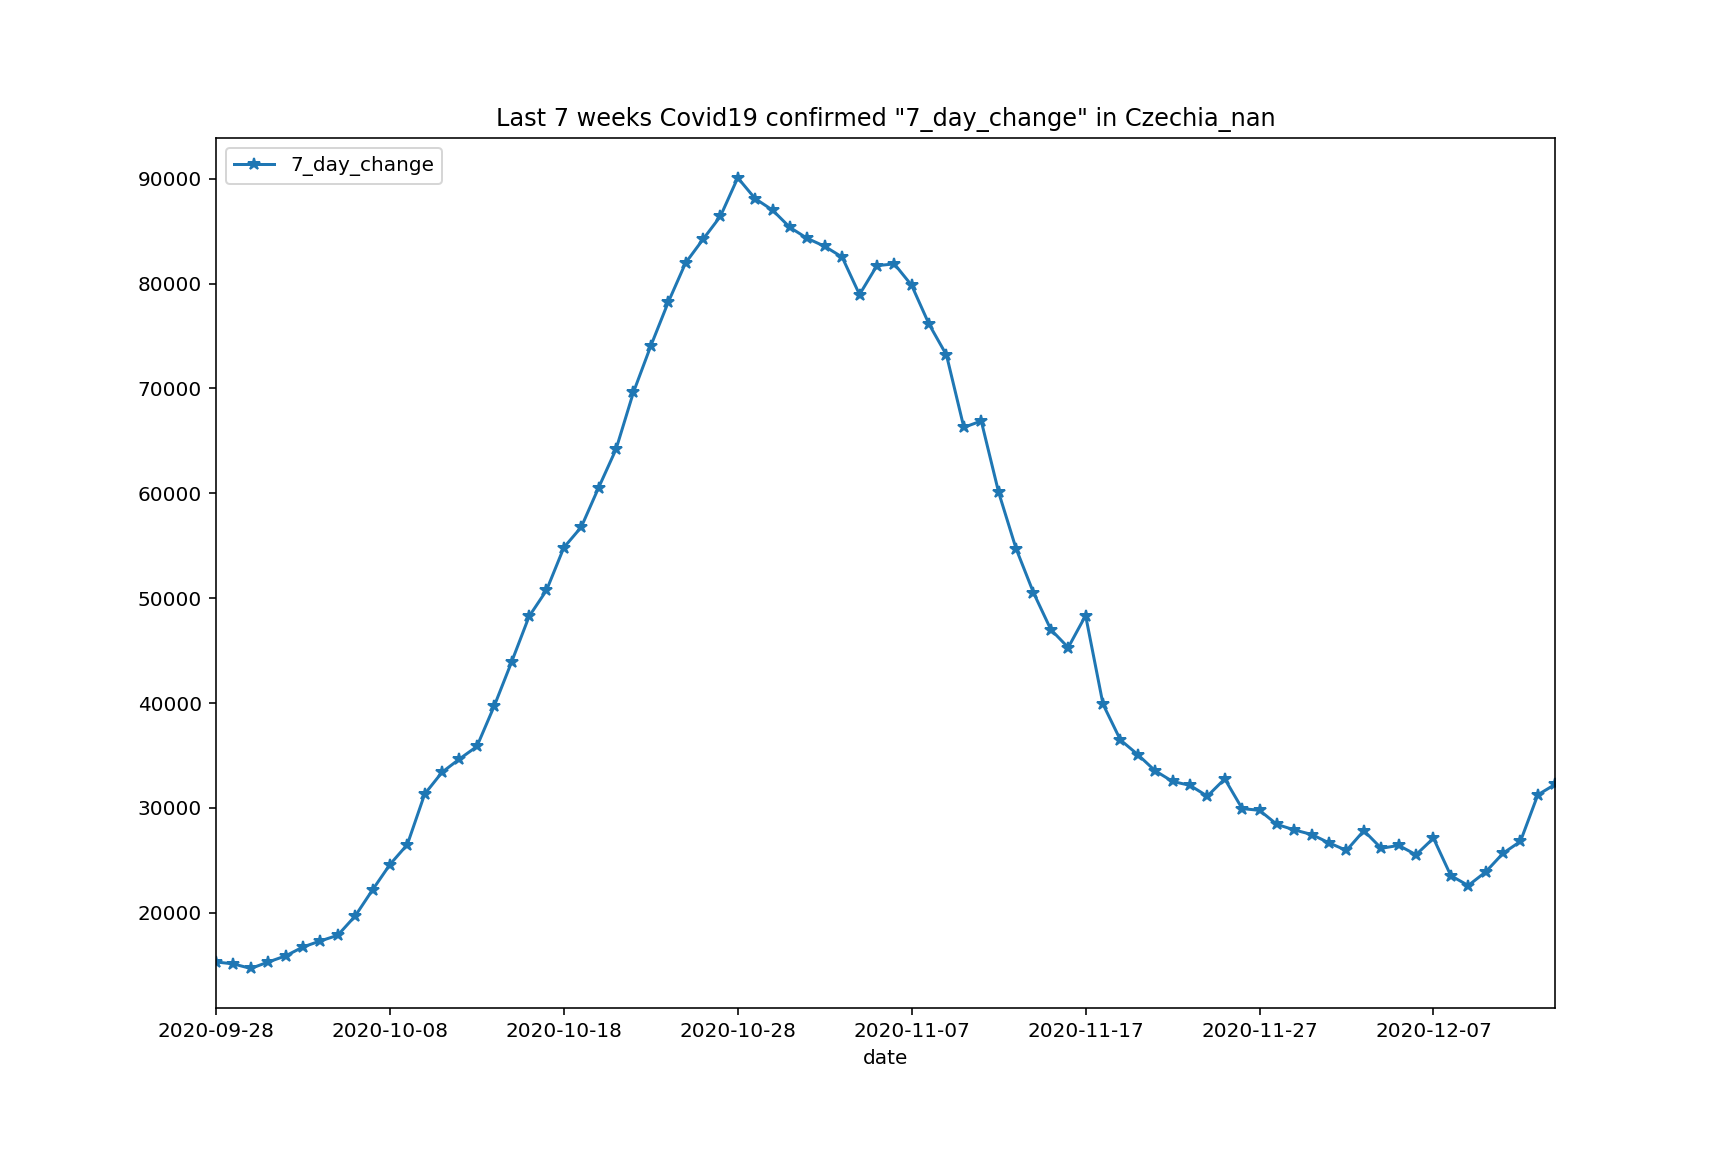

In [49]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


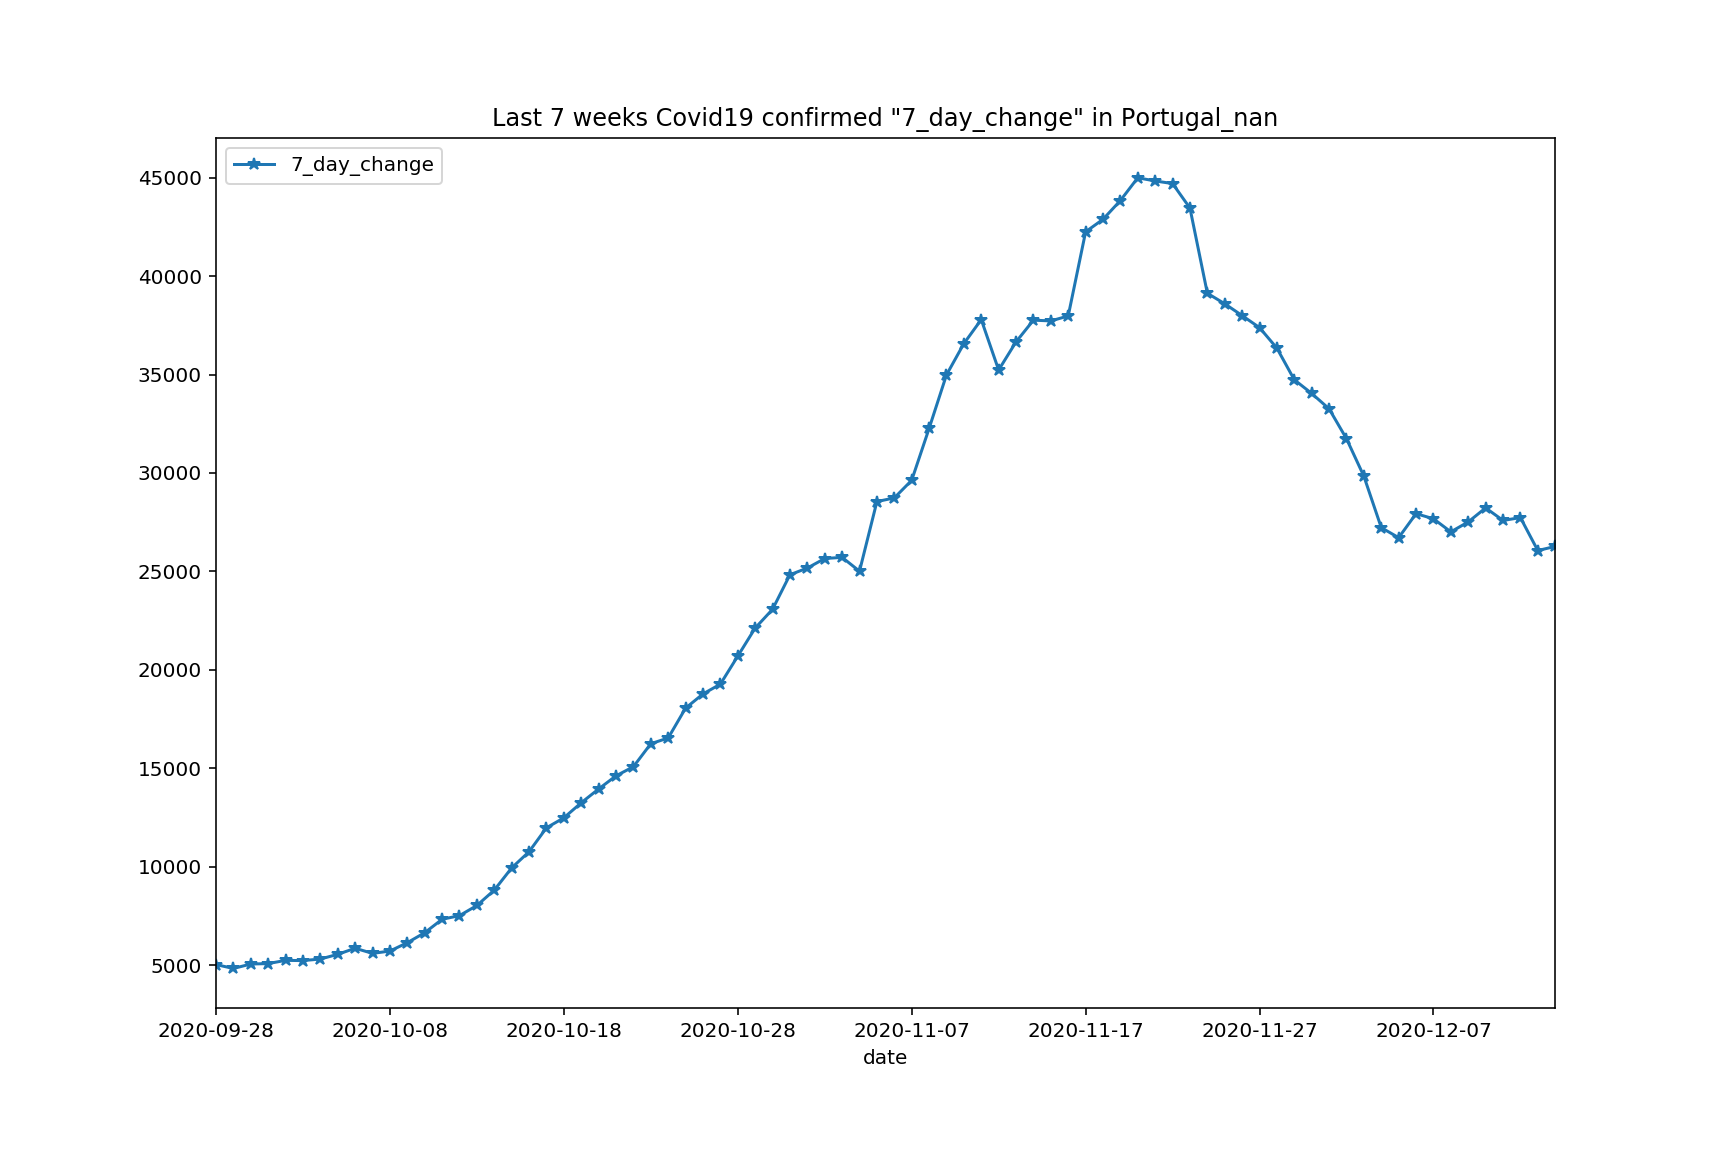

In [50]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [51]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


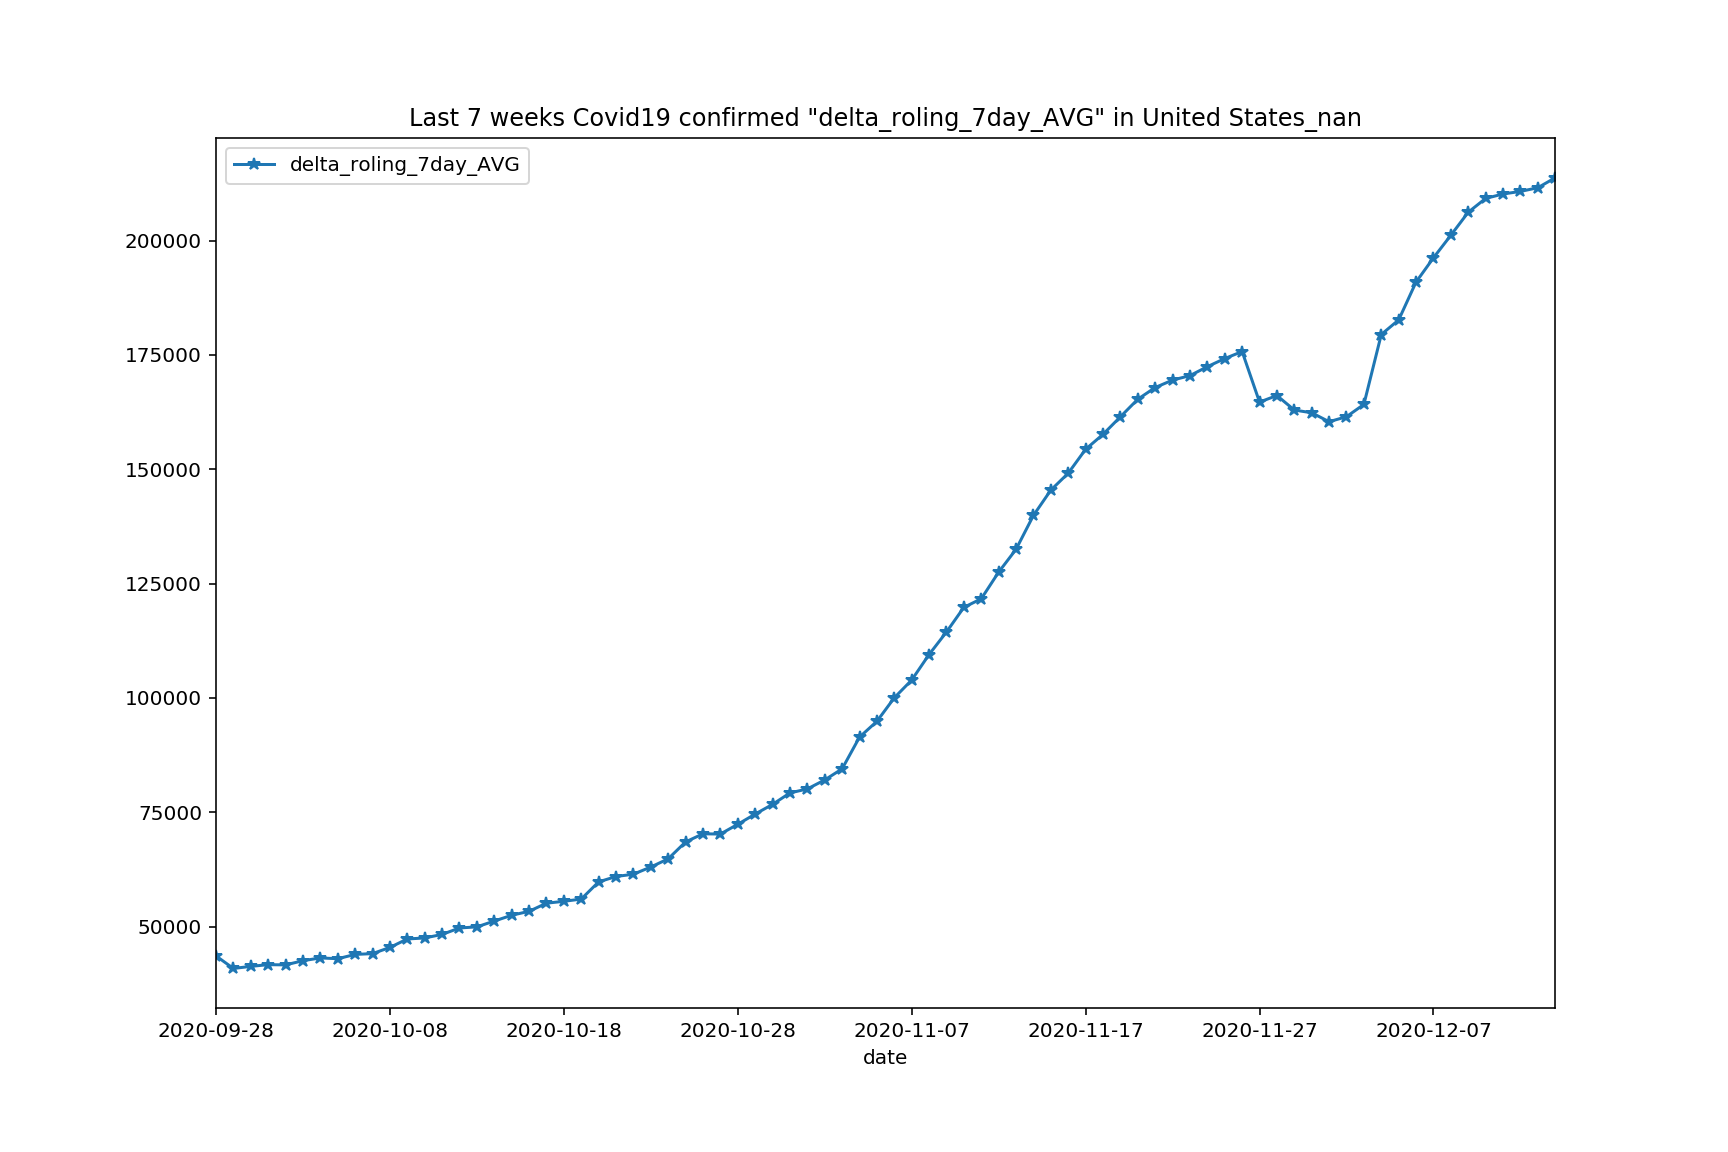

In [52]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


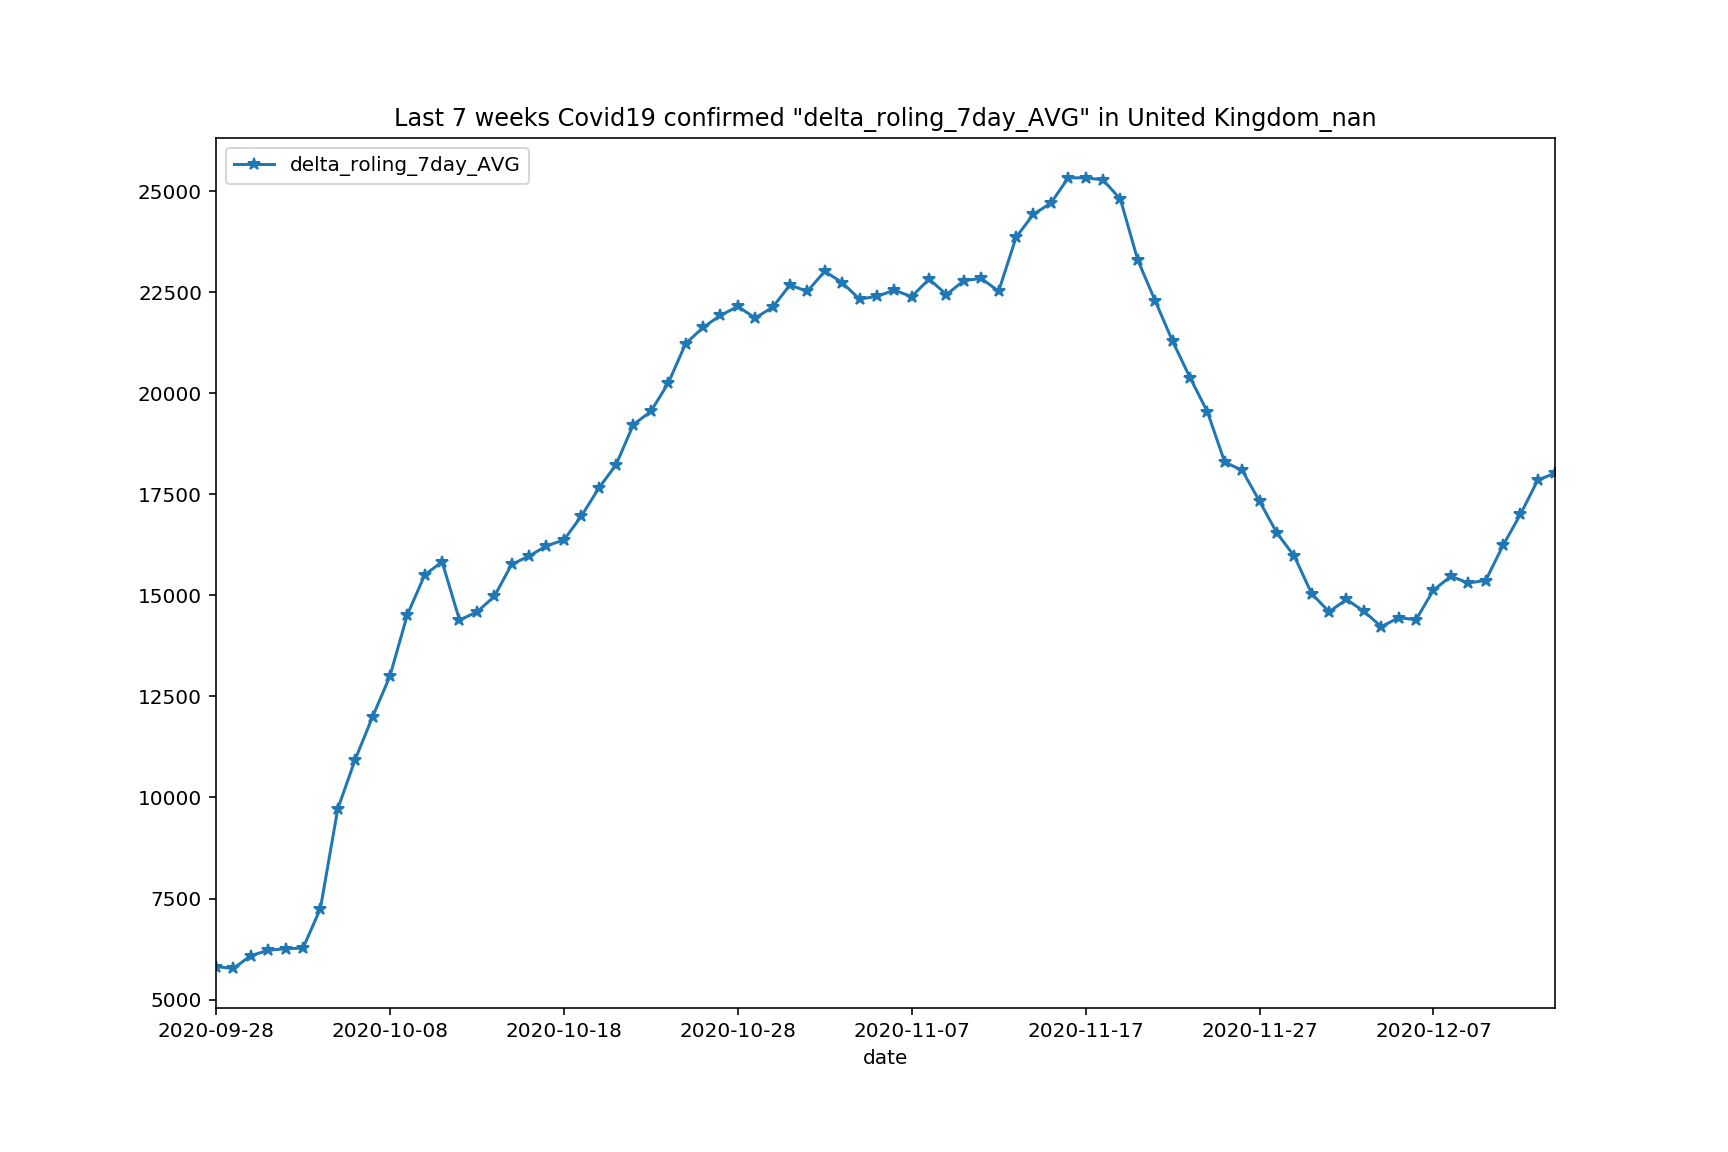

In [53]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


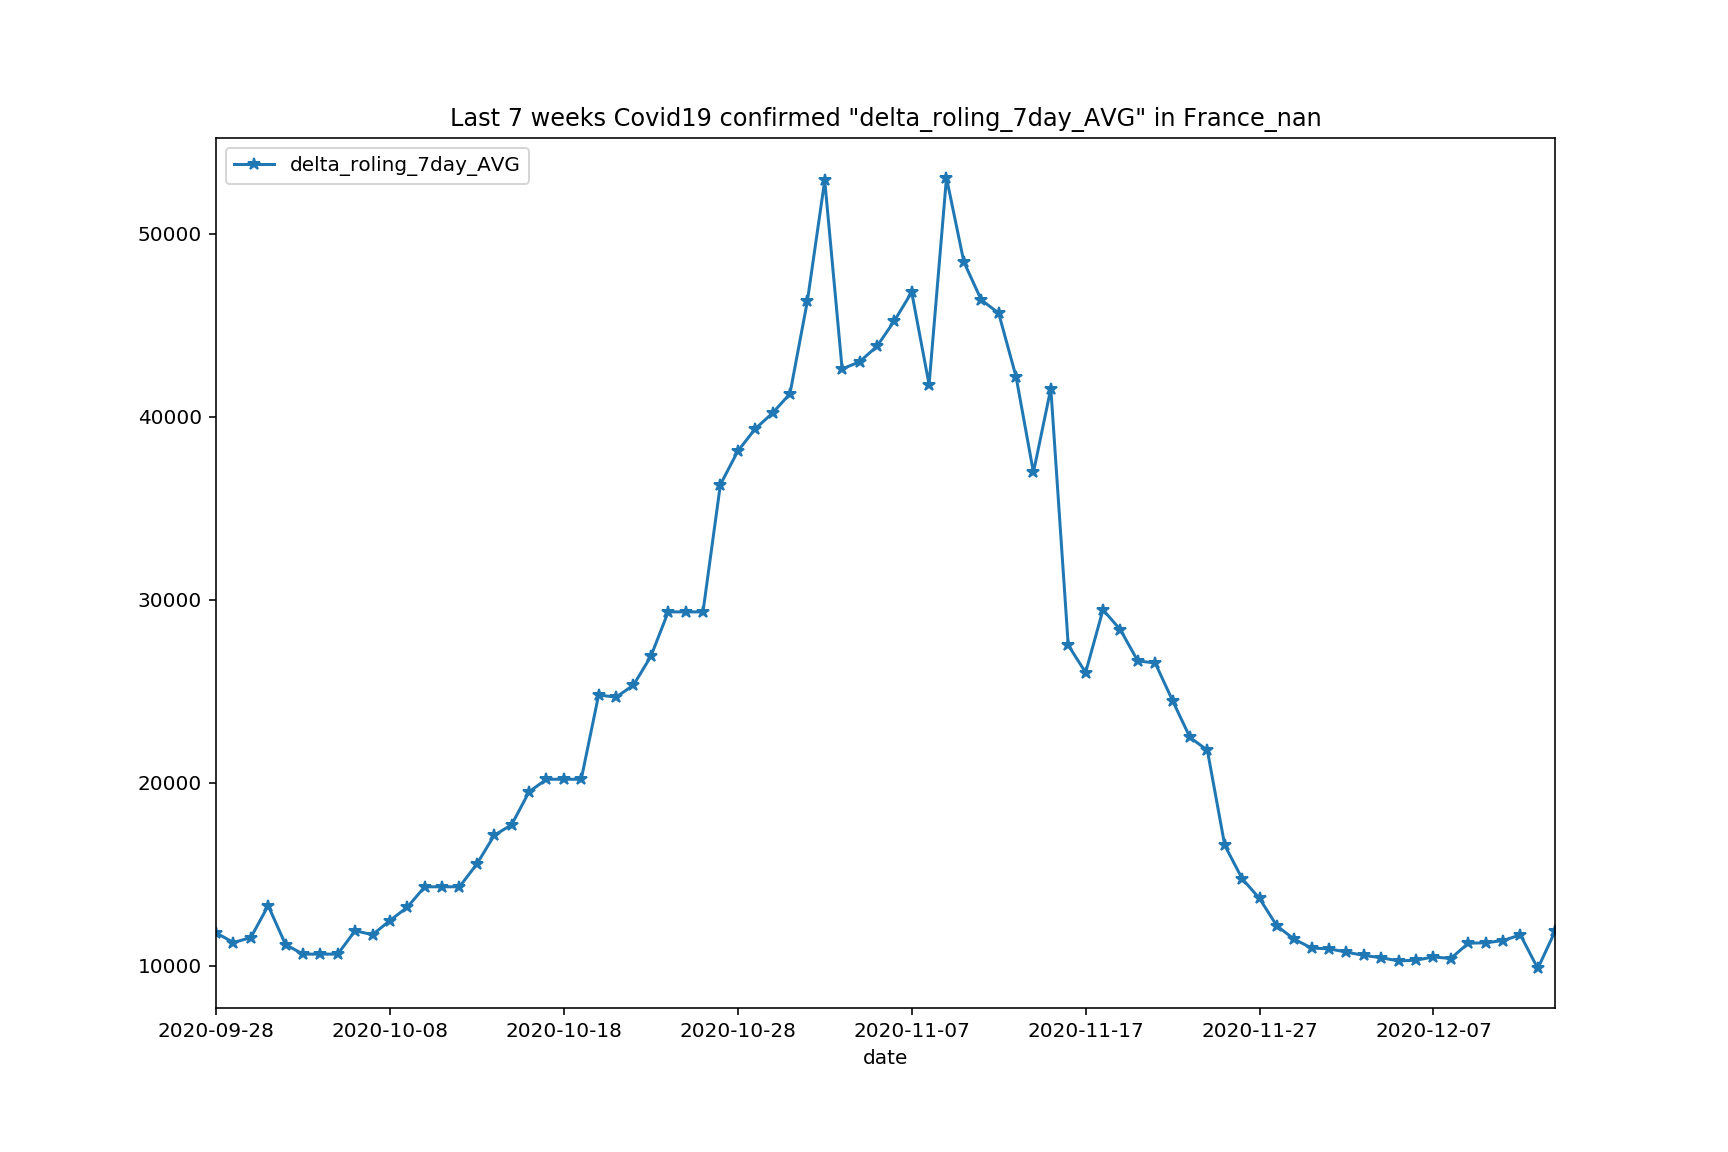

In [54]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


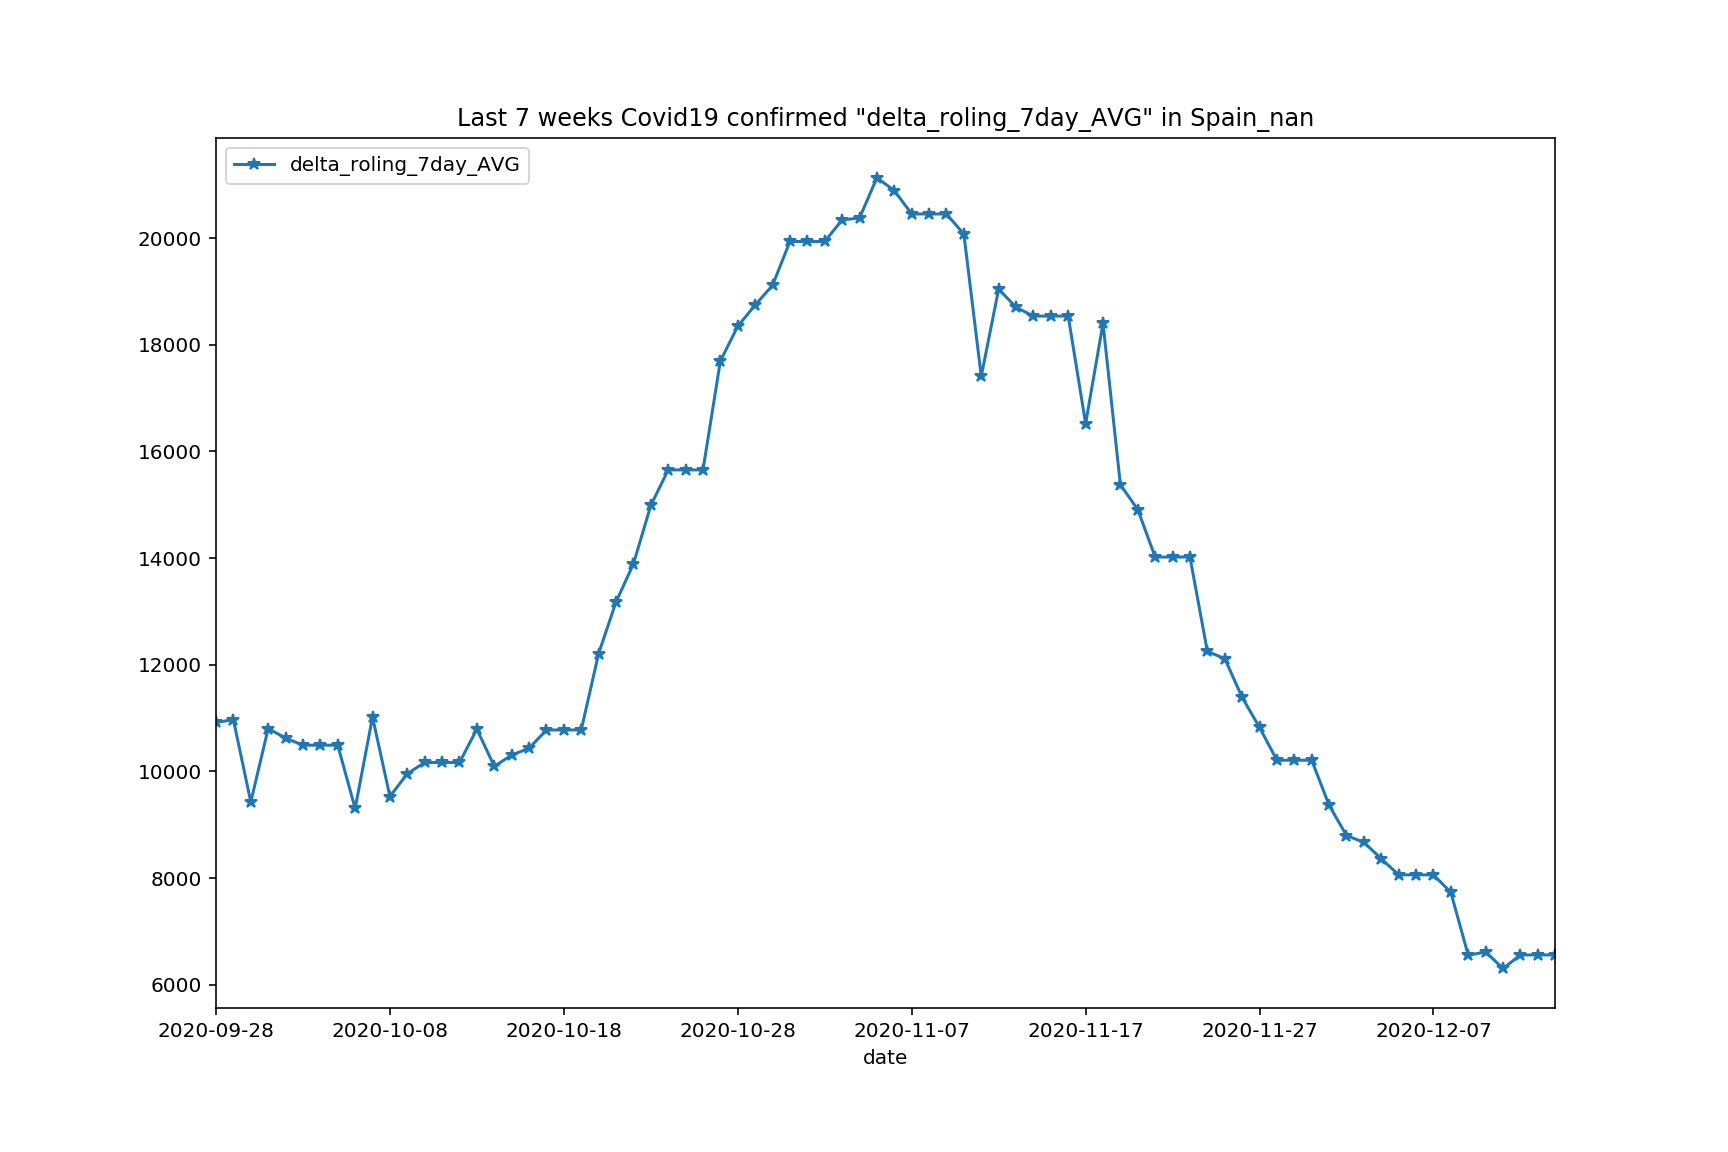

In [55]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


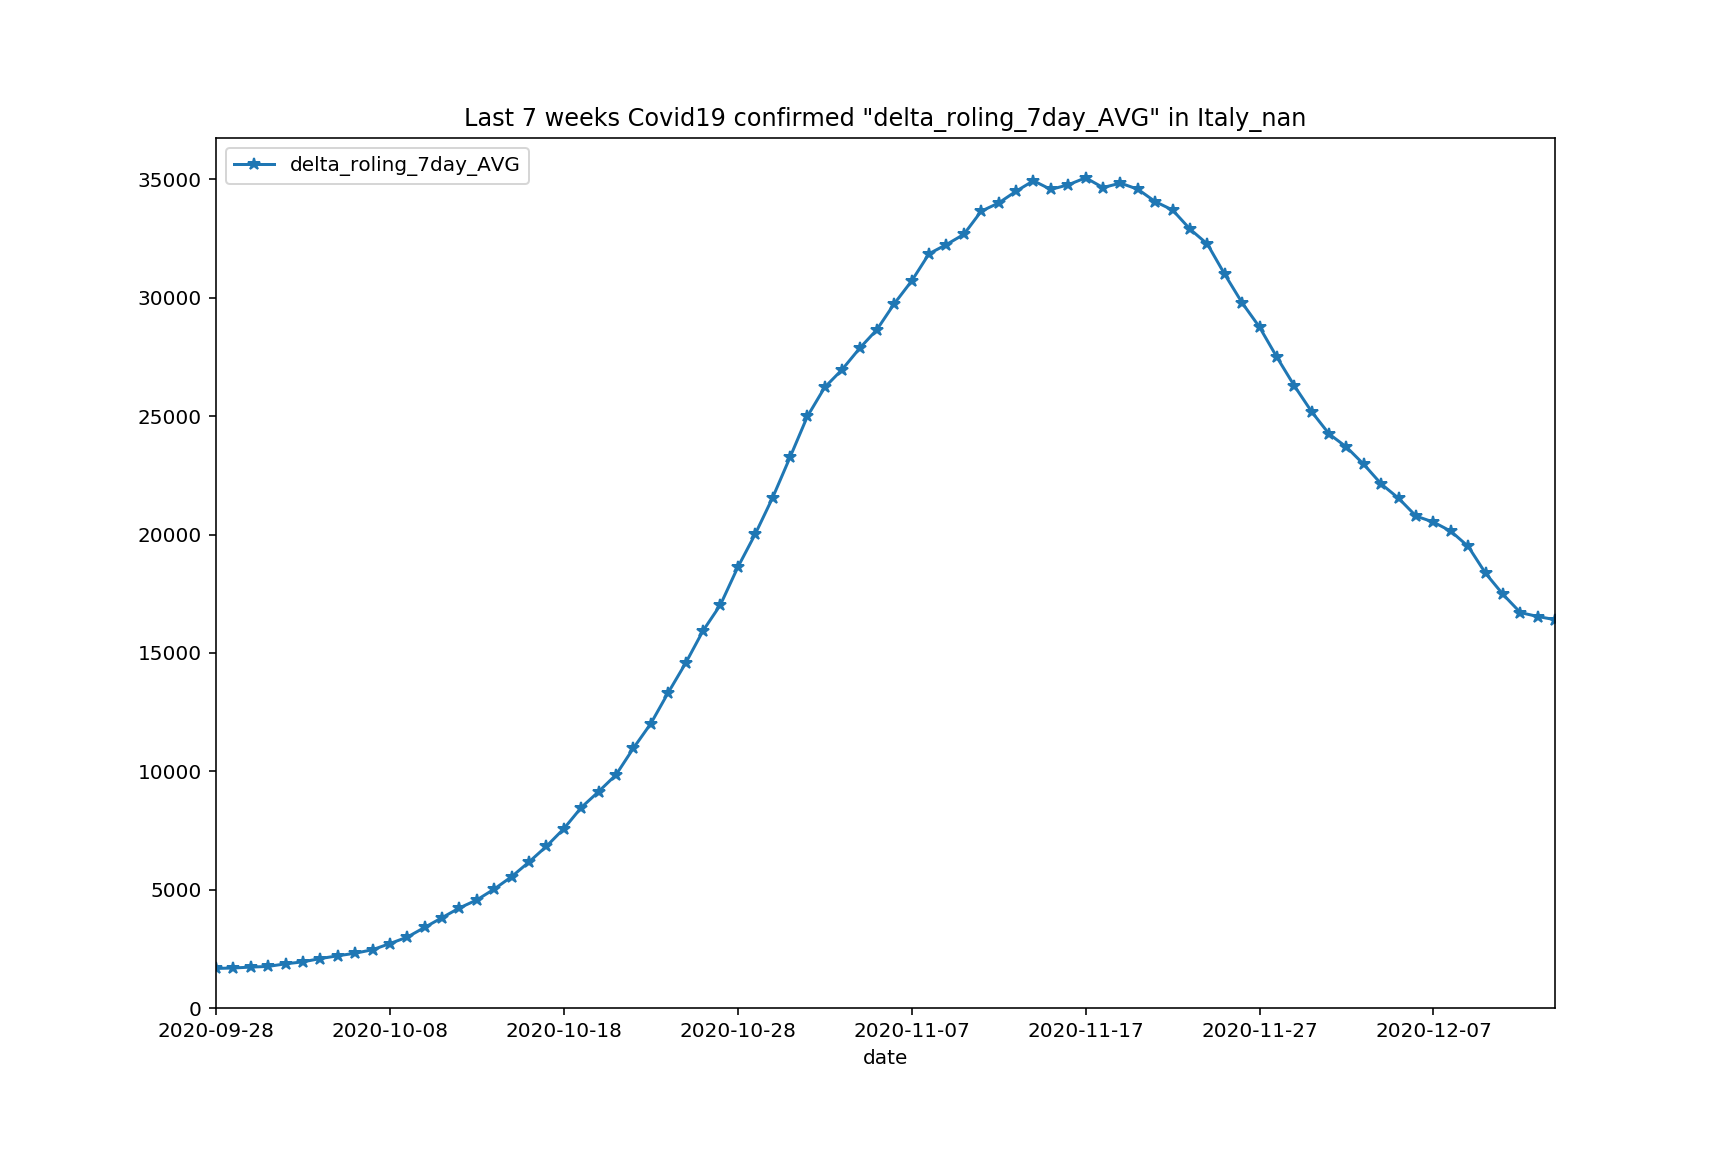

In [56]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


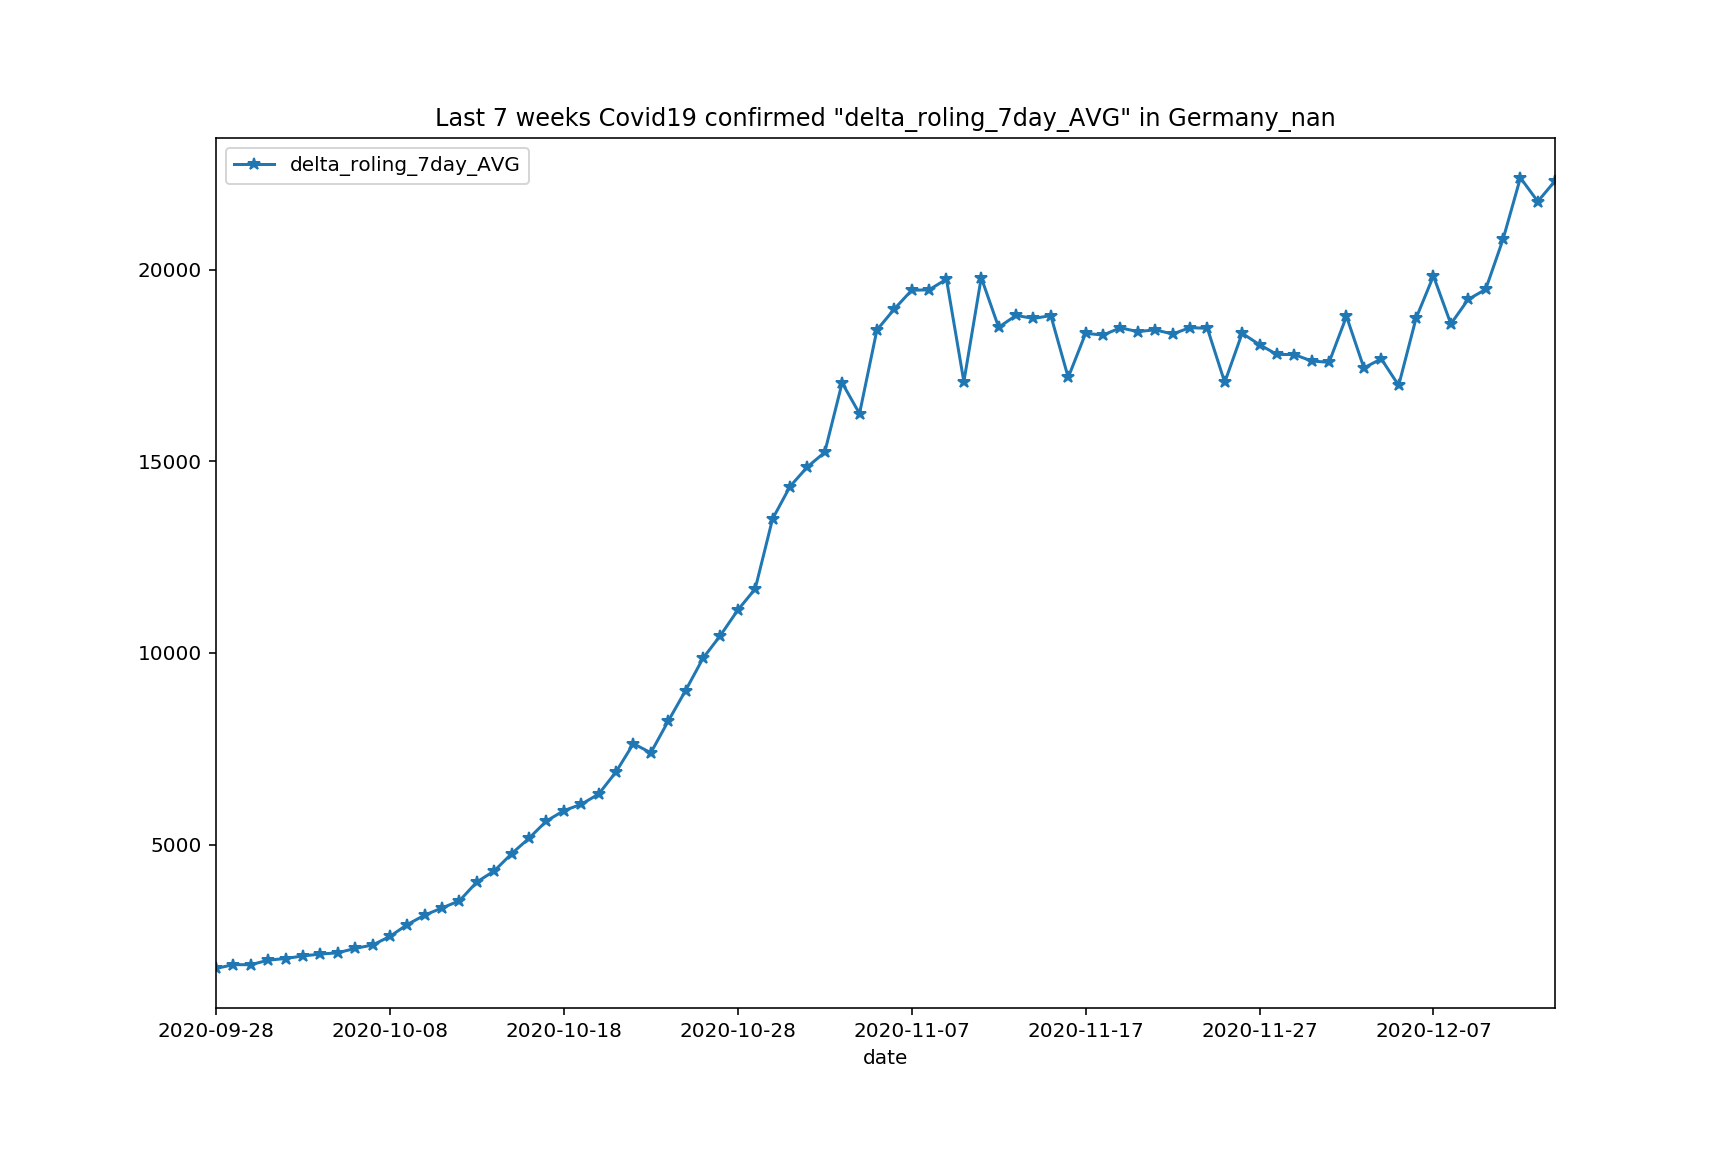

In [57]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


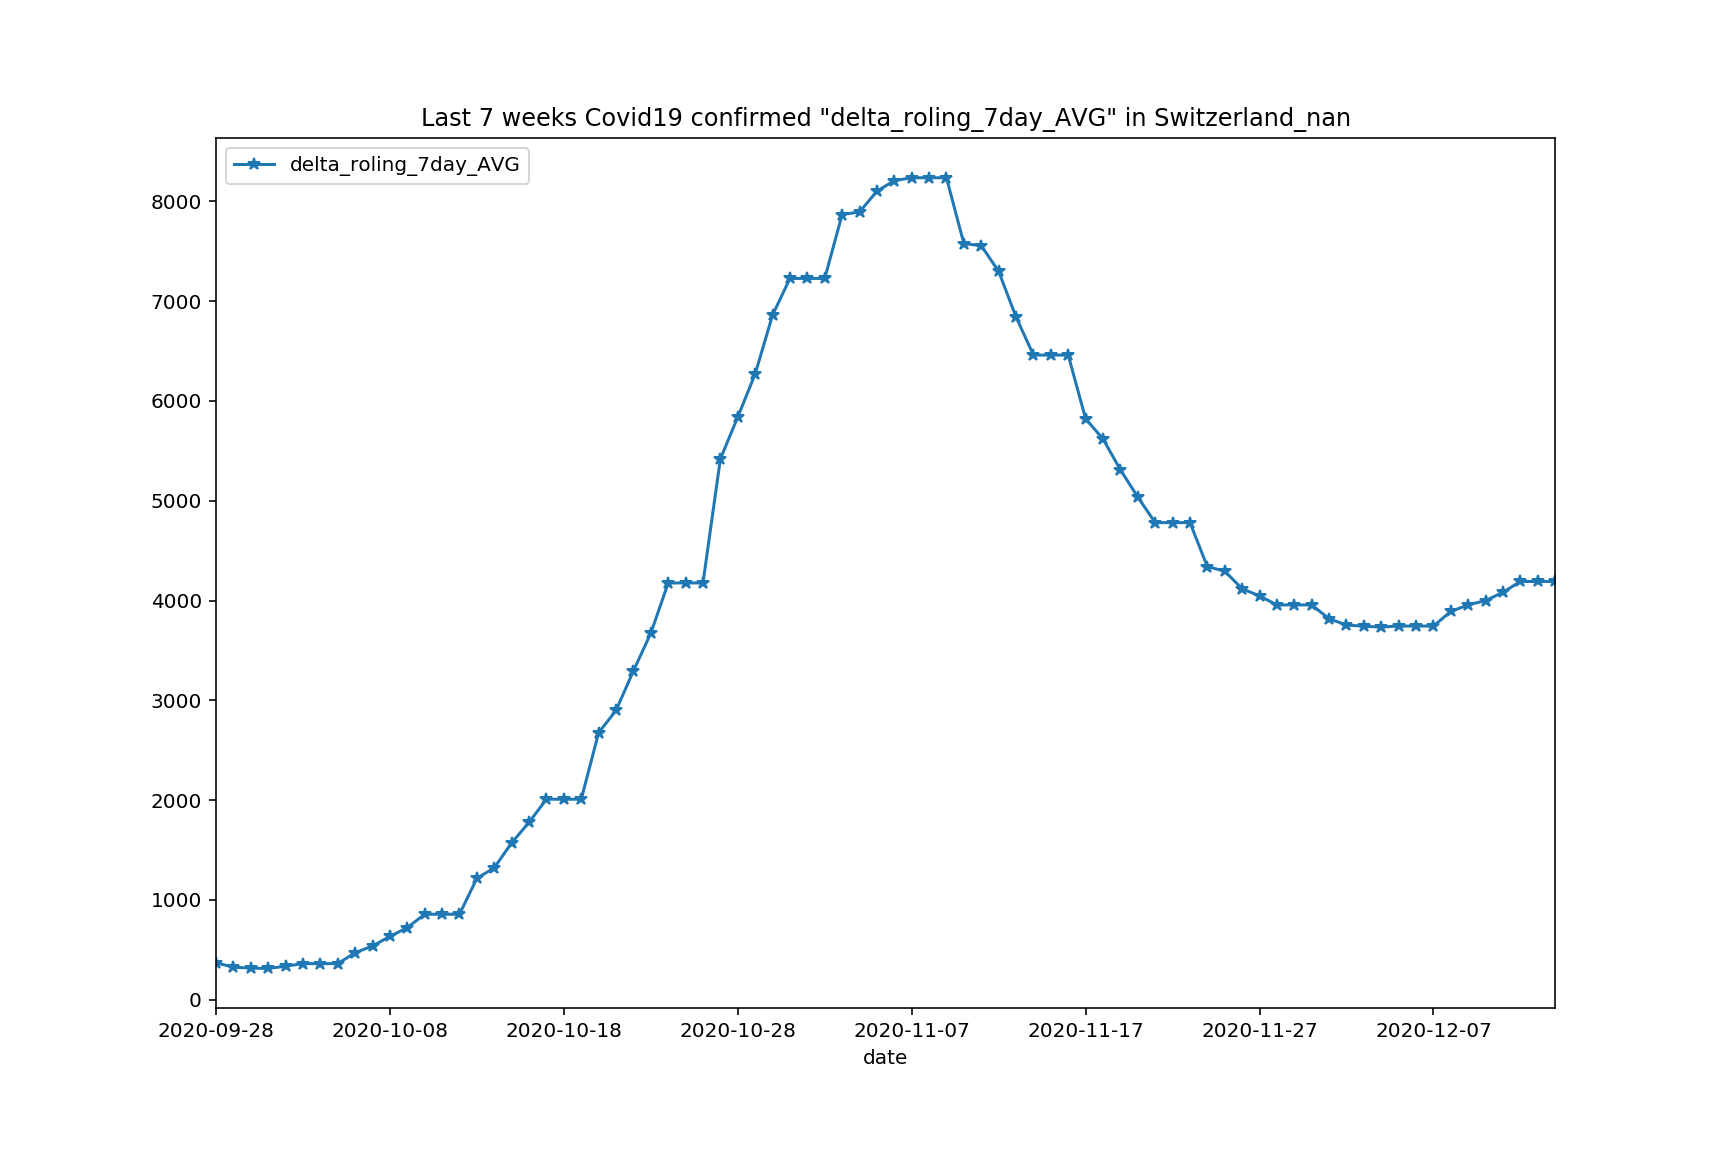

In [58]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


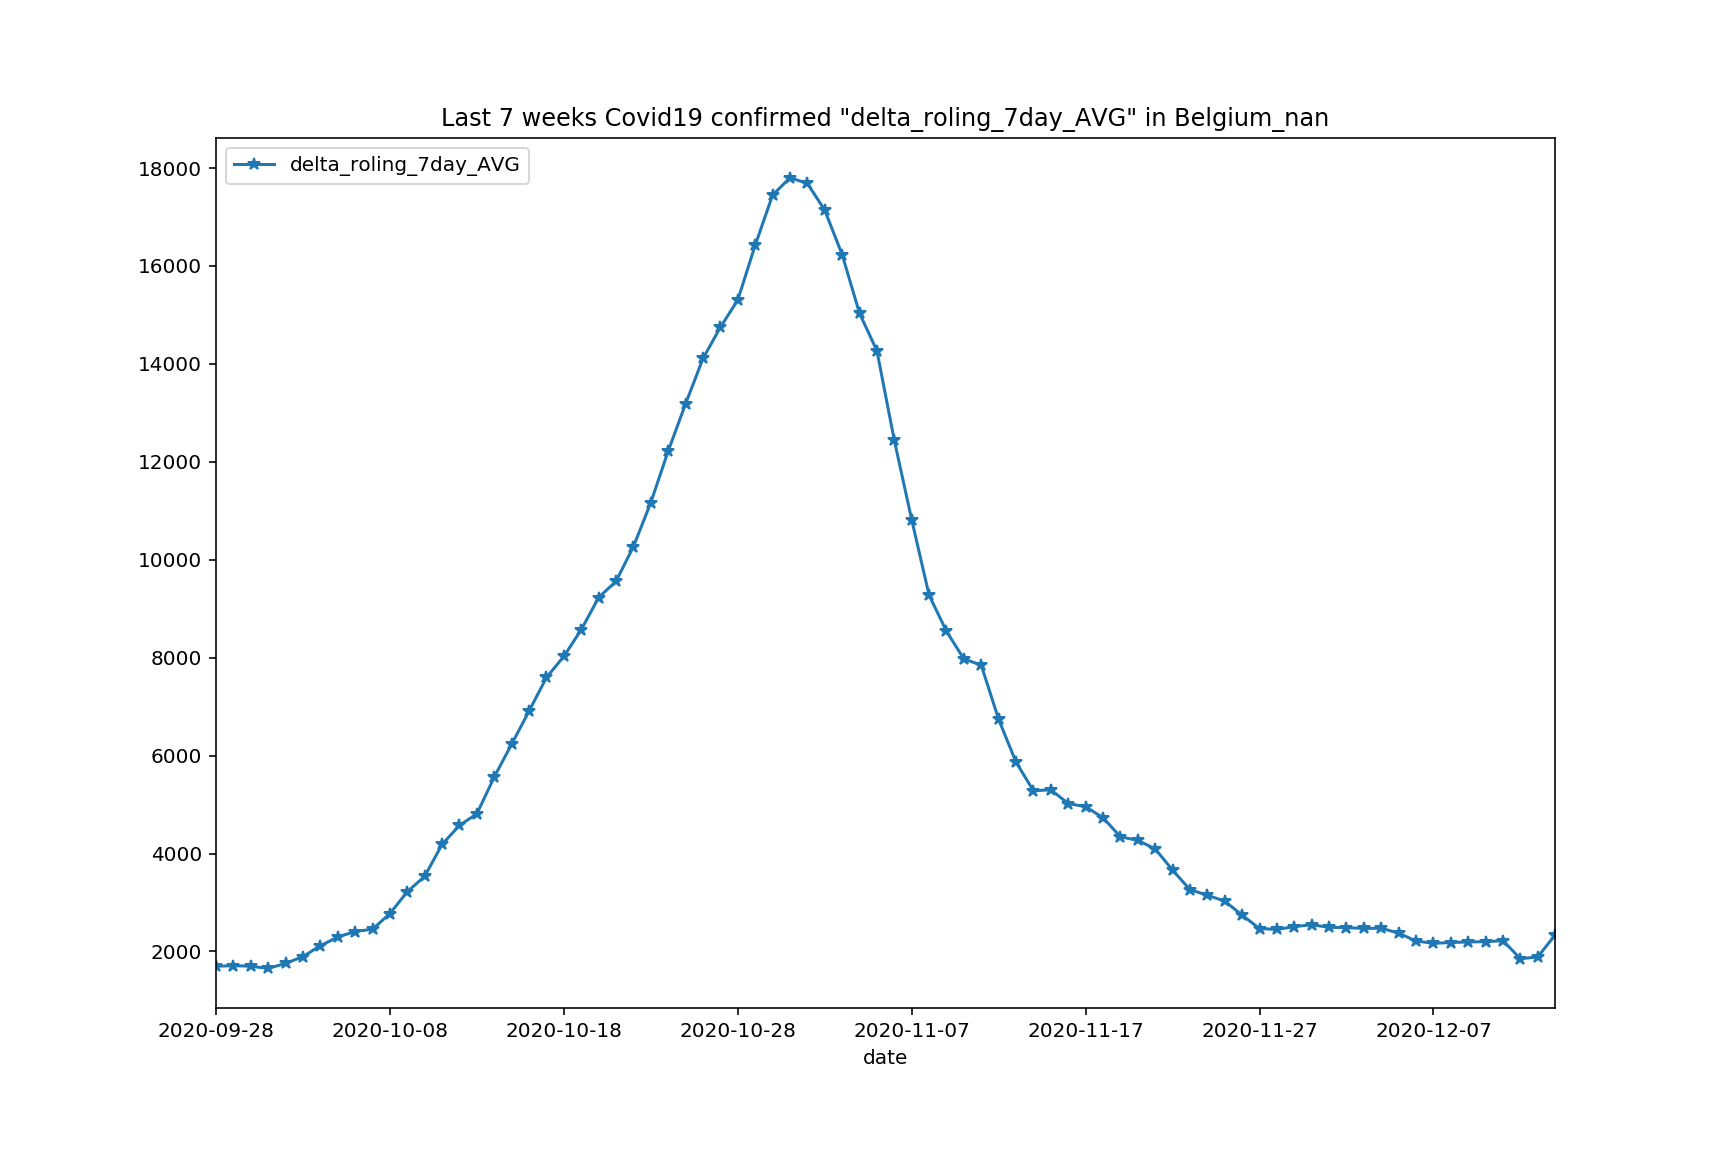

In [59]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


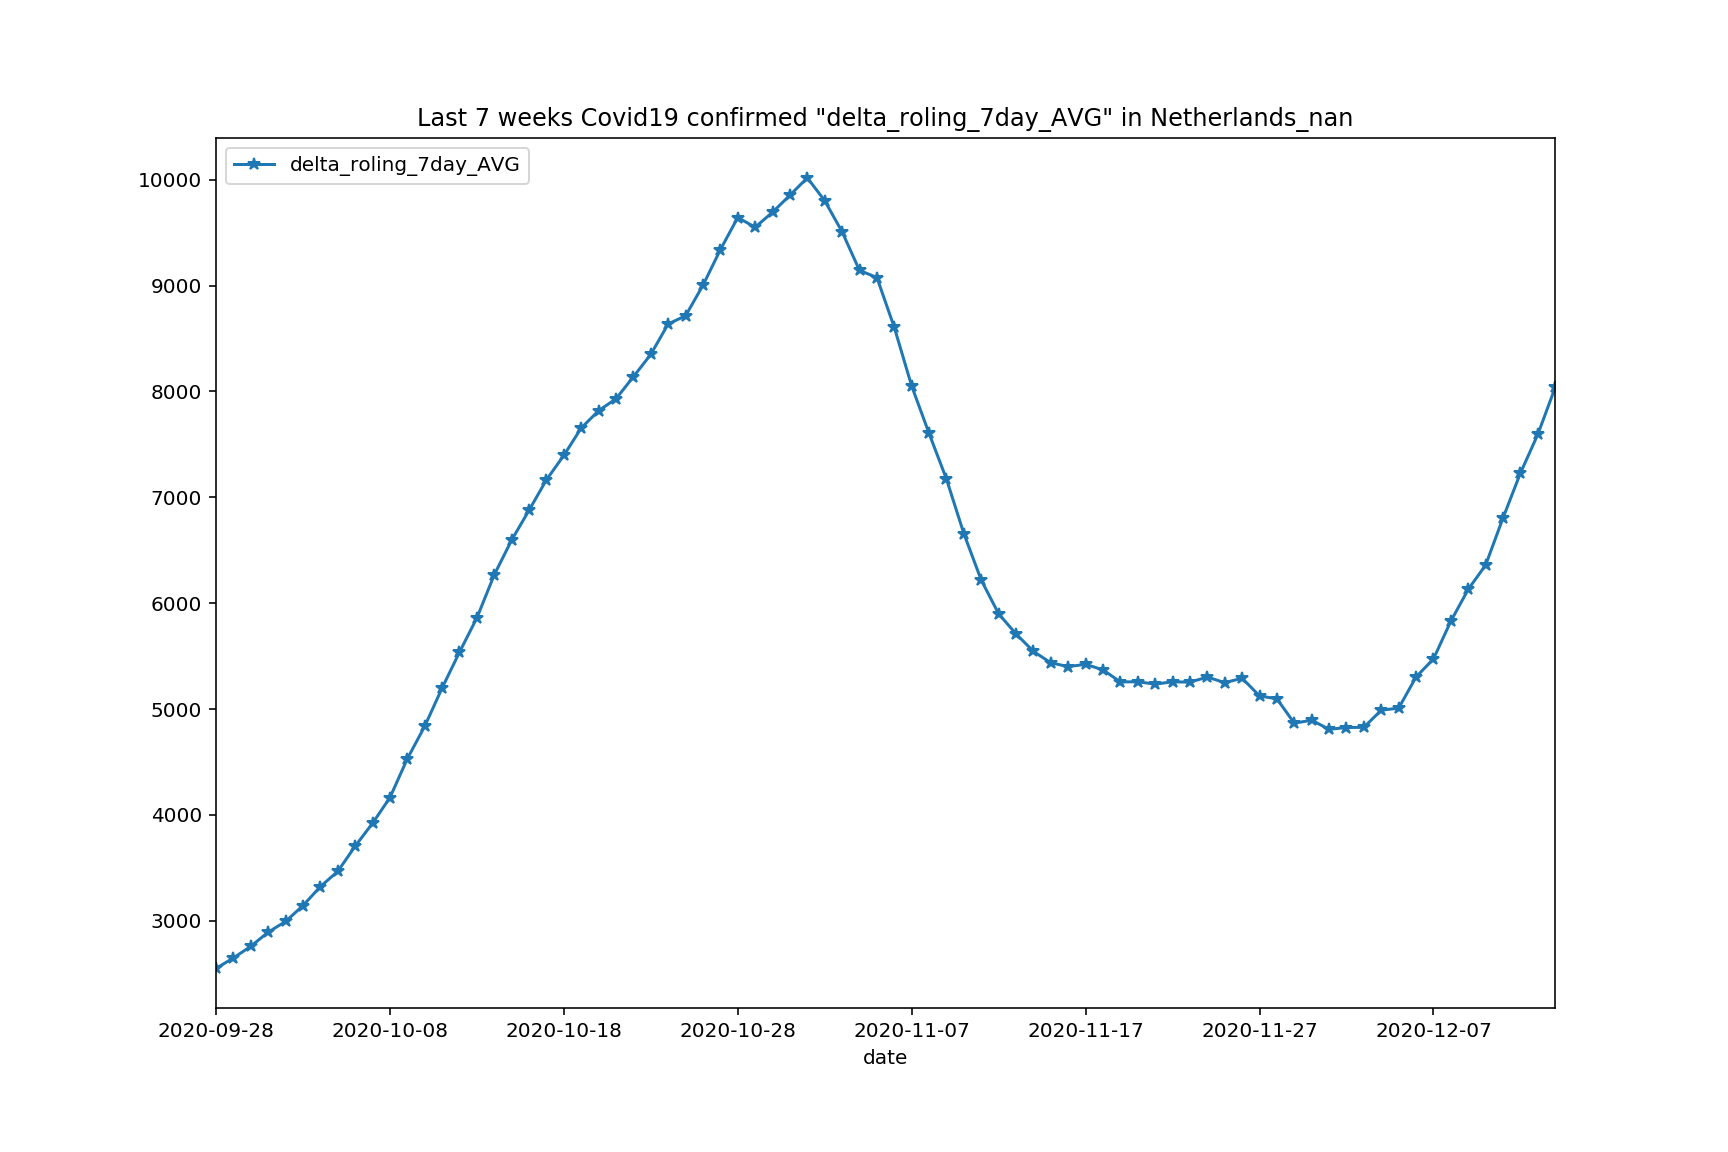

In [60]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


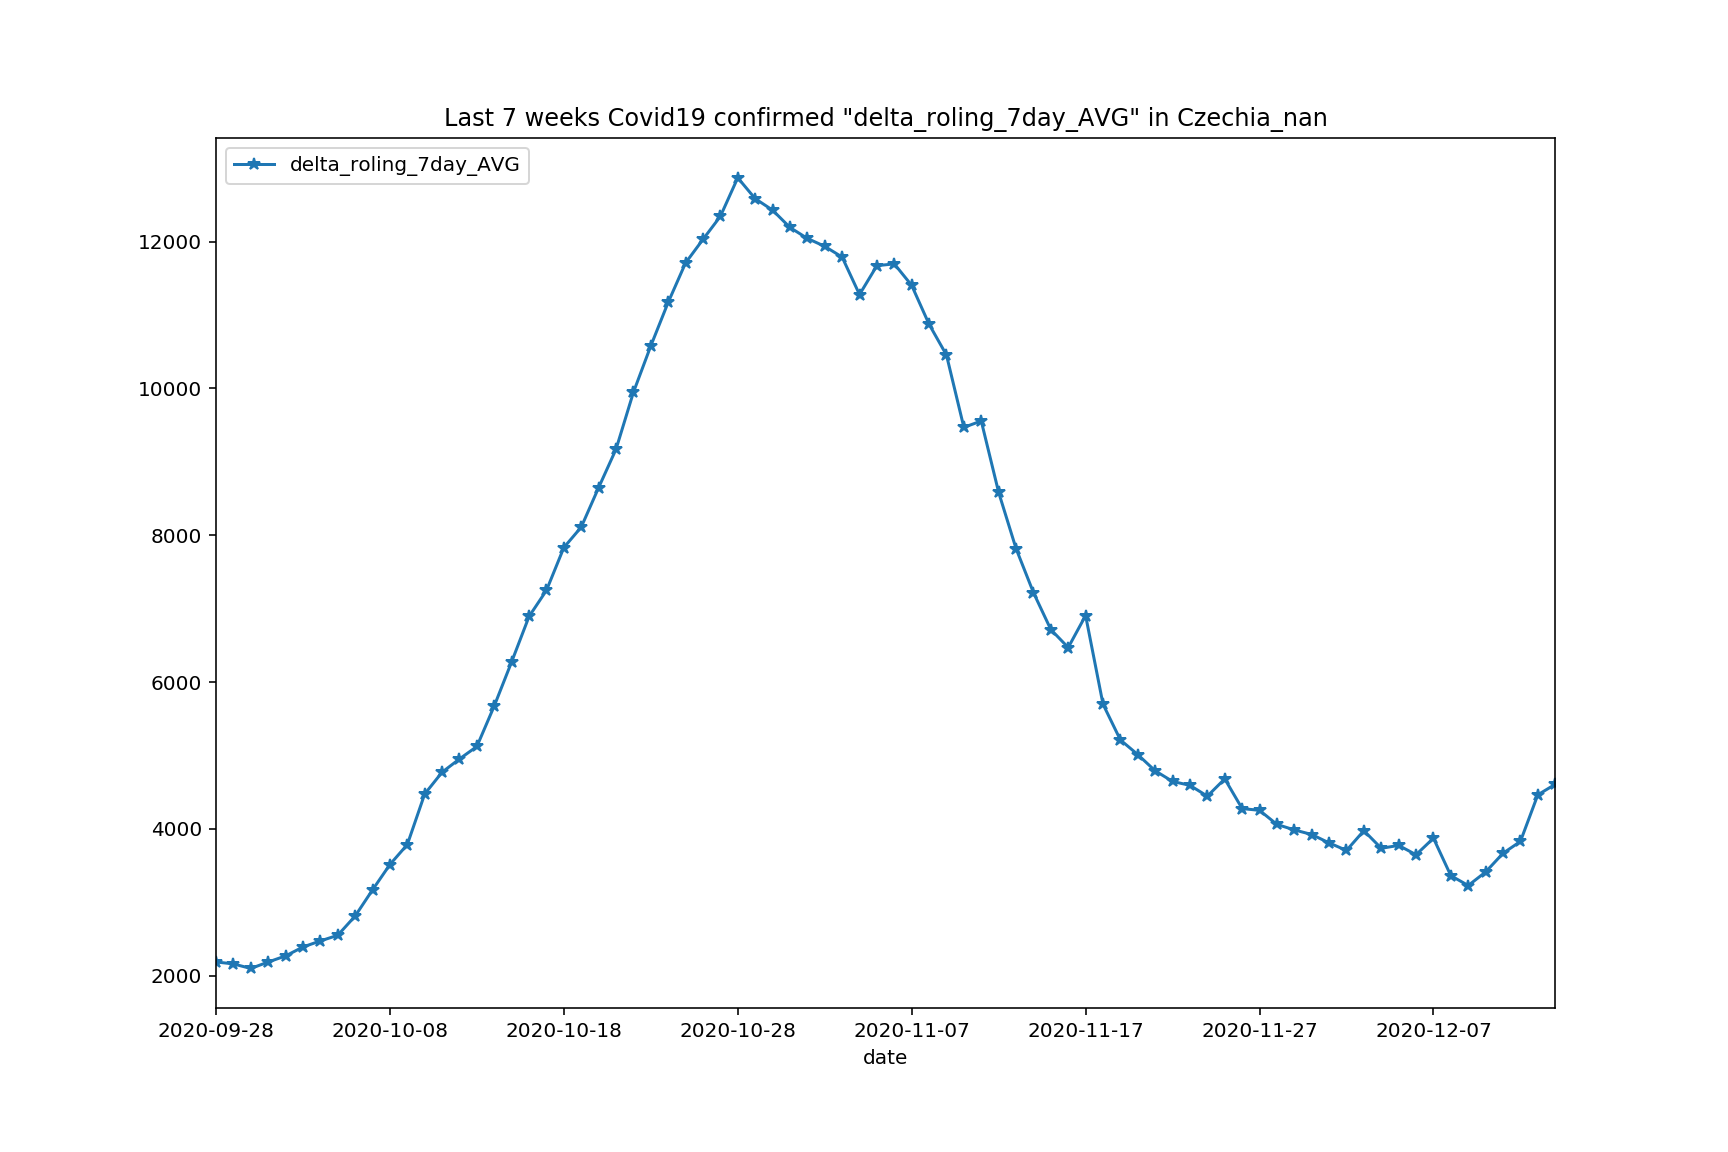

In [61]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


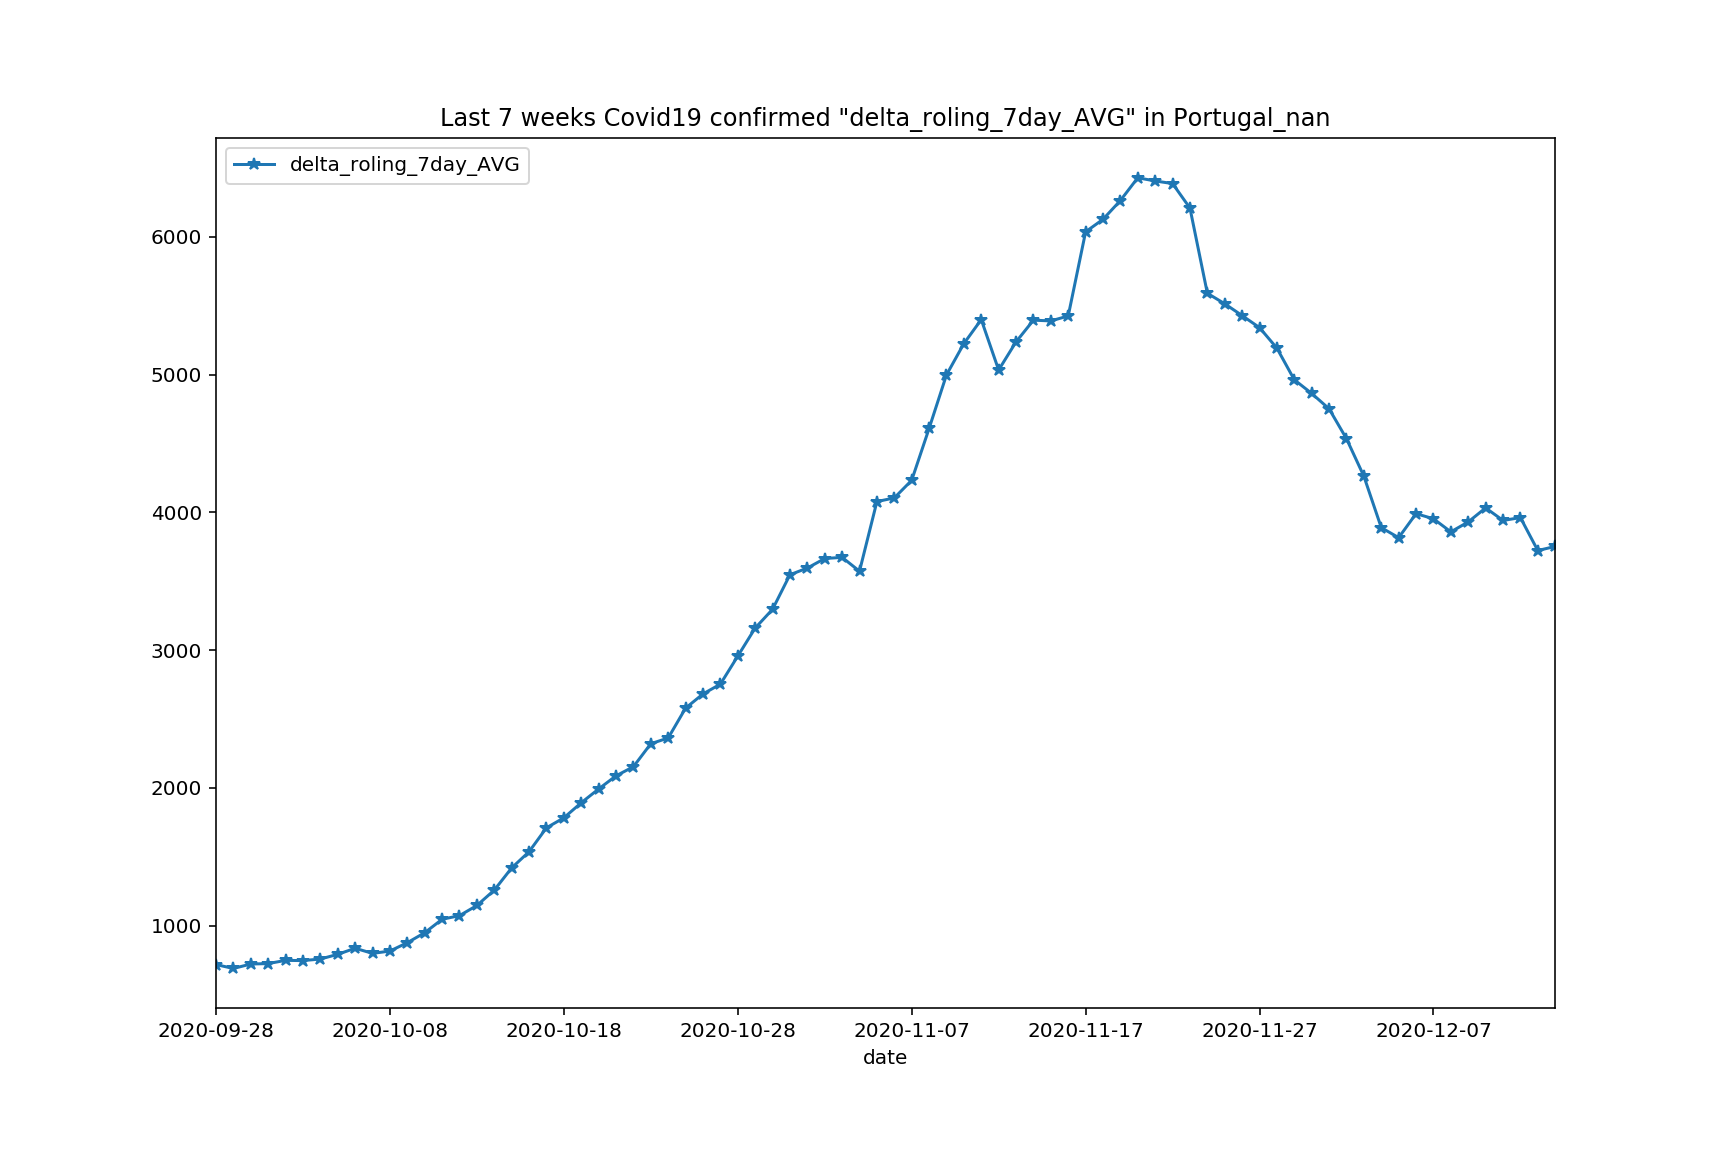

In [62]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [63]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [64]:
exit()